### Data Exploration and Understanding

In this code, I first loaded the dataset by collecting all `.tif` image filenames and reading YOLO annotations from `.txt` files. Then, I wrote a function to visualize an image by plotting its bounding boxes in red (for category 0) or blue (for category 1 and 2). Finally, I randomly selected an image and displayed it with its annotations.

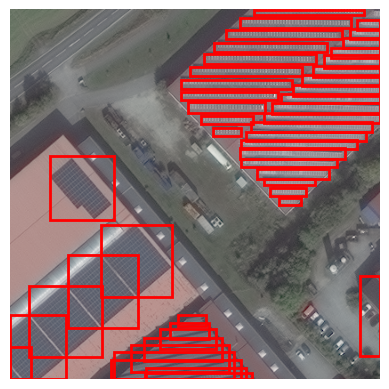

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


IMAGE_DIR = "image_chips_native"  
ANNOTATION_DIR = "labels/labels_native"

def collect_image_filenames(directory):
    image_files = {}
    for root, _, files in os.walk(directory):
        for file in files:
            name, ext = os.path.splitext(file)
            if ext.lower() == ".tif":  
                image_files[name] = os.path.join(root, file)
    return image_files

def load_annotations(annotation_dir):
    annotations = {}
    for file in os.listdir(annotation_dir):
        if file.endswith(".txt"):
            image_id = file.replace(".txt", "")
            with open(os.path.join(annotation_dir, file), "r") as f:
                boxes = [list(map(float, line.split())) for line in f.readlines()]
            annotations[image_id] = boxes
    return annotations

annotations = load_annotations(ANNOTATION_DIR)
image_files = collect_image_filenames(IMAGE_DIR)

# Function to visualize an image with bounding boxes
def visualize_sample(image_id, annotations, image_files):
    image_path = image_files.get(image_id)
    
    if not image_path:
        print(f"Image not found: {image_id}")
        return

    # Load image
    image = Image.open(image_path)
    image_np = np.array(image)

    plt.imshow(image_np)
    plt.axis("off")

    for annotation in annotations.get(image_id, []):
        category, x_center, y_center, width, height = annotation
        x1 = (x_center - width / 2) * image_np.shape[1]
        y1 = (y_center - height / 2) * image_np.shape[0]
        x2 = (x_center + width / 2) * image_np.shape[1]
        y2 = (y_center + height / 2) * image_np.shape[0]

        color = "red" if category == 0 else "blue"  
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                          edgecolor=color, facecolor="none", lw=2))

    plt.show()

random_image_id = np.random.choice(list(annotations.keys()))
visualize_sample(random_image_id, annotations, image_files)


Then i created a function to modify annotation files by changing all category labels to 0 as the rest of the categories were not mentioned on the website that what they refer and upon seeing some of them we saw that they were also bbox of solar panels only so we relabel all the categories into 0. It reads each .txt file in the given folder, updates the category in every line while keeping the bounding box coordinates unchanged, and then overwrites the file with the new labels.

In [4]:
def remap_categories(folder_path):
    for file in os.listdir(folder_path):
        if file.endswith(".txt"):
            file_path = os.path.join(folder_path, file)
            with open(file_path, "r") as f:
                lines = f.readlines()
                
            remapped_lines = ["0 " + " ".join(line.split()[1:]) + "\n" for line in lines]
            with open(file_path, "w") as f:
                f.writelines(remapped_lines)
                
remap_categories(ANNOTATION_DIR)


In [5]:
from collections import defaultdict

ANNOTATION_DIR = "labels\labels_native"  
category_counts = defaultdict(int)
unique_categories = set()

for file in os.listdir(ANNOTATION_DIR):
    if file.endswith(".txt"):
        file_path = os.path.join(ANNOTATION_DIR, file)
        with open(file_path, "r") as f:
            categories_in_file = set()  
            for line in f.readlines():
                parts = line.strip().split()
                if parts:
                    category = int(parts[0]) 
                    category_counts[category] += 1
                    categories_in_file.add(category)
                    unique_categories.add(category)

print(f"Total counts of each category: {dict(category_counts)}")
print(f"Unique categories present: {sorted(unique_categories)}")

Total counts of each category: {0: 29625}
Unique categories present: [0]


In this code, I computed statistics for the dataset by counting the total number of solar panel instances and analyzing how many labels each image has. I then displayed these counts and plotted a bar chart showing the distribution of labels per image. The chart helps visualize how many images contain a certain number of annotations.

Total solar panel instances: 29625
81 images have 1 labels
167 images have 2 labels
221 images have 3 labels
218 images have 4 labels
217 images have 5 labels
189 images have 6 labels
170 images have 7 labels
184 images have 8 labels
169 images have 9 labels
121 images have 10 labels
97 images have 11 labels
84 images have 12 labels
69 images have 13 labels
49 images have 14 labels
46 images have 15 labels
41 images have 16 labels
36 images have 17 labels
25 images have 18 labels
29 images have 19 labels
14 images have 20 labels
4 images have 21 labels
1 images have 22 labels
4 images have 23 labels
2 images have 24 labels
4 images have 25 labels
3 images have 26 labels
5 images have 27 labels
5 images have 28 labels
15 images have 29 labels
20 images have 30 labels
8 images have 31 labels
7 images have 32 labels
13 images have 33 labels
19 images have 34 labels
10 images have 35 labels
6 images have 36 labels
17 images have 37 labels
13 images have 38 labels
6 images have 39 labels
9 

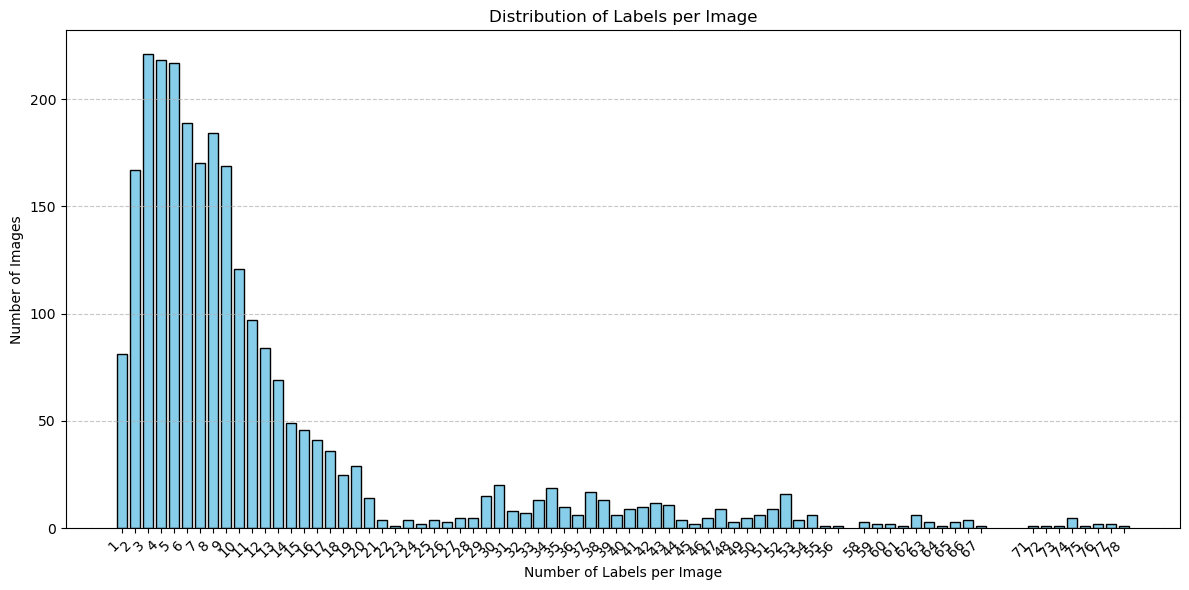

In [6]:
def compute_dataset_statistics(annotations):
    instances_count = sum(len(boxes) for boxes in annotations.values())
    label_counts = [len(boxes) for boxes in annotations.values()]
    unique_labels, counts = np.unique(label_counts, return_counts=True)
    print(f"Total solar panel instances: {instances_count}")
    for label, count in zip(unique_labels, counts):
        print(f"{count} images have {label} labels")
    
    plt.figure(figsize=(12, 6)) 
    plt.bar(unique_labels, counts, color="skyblue", edgecolor="black")
    plt.xlabel("Number of Labels per Image")
    plt.ylabel("Number of Images")
    plt.title("Distribution of Labels per Image")
    plt.xticks(unique_labels, rotation=45, ha="right")  
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout() 
    plt.show()
    
compute_dataset_statistics(annotations)


Here I calculated the areas of solar panels in square meters by converting pixel dimensions using a resolution of 31 cm/pixel as given in the website. Then, I computed the mean and standard deviation of these areas. Finally, I plotted a histogram to visualize the distribution of solar panel areas in the dataset.

From the histogram it is clear that the area of the solar panels installed are very low meaning they are not large soalr panel bases but just small solar panels installed on the terraces of the buildings

Mean area: 0.00110668 m², Std: 0.00364449 m²


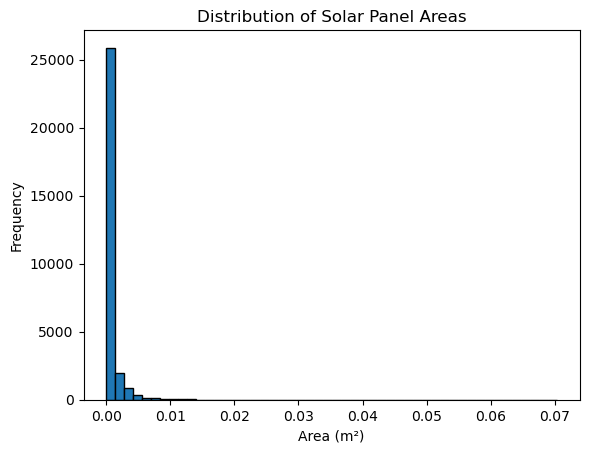

In [7]:
areas = []
for boxes in annotations.values():
    for box in boxes:
        category, x, y, w_px, h_px = box
        w_px *= 0.31  
        h_px *= 0.31
        areas.append(w_px * h_px)

mean_area = np.mean(areas)
std_area = np.std(areas)
print(f"Mean area: {mean_area:.8f} m², Std: {std_area:.8f} m²")

# Plot histogram
plt.hist(areas, bins=50, edgecolor='black')
plt.xlabel('Area (m²)')
plt.ylabel('Frequency')
plt.title('Distribution of Solar Panel Areas')
plt.show()

Here I imported the shapely and supervision lib to compute and compare IOU

In [2]:
from shapely.geometry import box as shapely_box
from supervision.detection.utils import box_iou_batch

import supervision
print(dir(supervision.detection.utils))

['Any', 'CLASS_NAME_DATA_FIELD', 'Dict', 'List', 'MIN_POLYGON_POINT_COUNT', 'Optional', 'Tuple', 'Union', 'Vector', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_mask_iou_batch_split', 'approximate_polygon', 'box_iou_batch', 'calculate_masks_centroids', 'chain', 'clip_boxes', 'contains_holes', 'contains_multiple_segments', 'cross_product', 'cv2', 'extract_ultralytics_masks', 'filter_polygons_by_area', 'get_data_item', 'is_data_equal', 'is_metadata_equal', 'mask_iou_batch', 'mask_to_polygons', 'mask_to_xyxy', 'merge_data', 'merge_metadata', 'move_boxes', 'move_masks', 'move_oriented_boxes', 'np', 'npt', 'oriented_box_iou_batch', 'pad_boxes', 'polygon_to_mask', 'polygon_to_xyxy', 'process_roboflow_result', 'scale_boxes', 'spread_out_boxes', 'xcycwh_to_xyxy', 'xywh_to_xyxy']


### Implementing the Fundamental Functions
Here in this code block I computed IOU using both the shapely and supervision library and after printing result both the results came sa,e which shoyuld come because no matter the library and method the maths is still same i.e Intersection / Union

In [5]:
def compute_iou_shapely(box1, box2):
    b1 = shapely_box(box1[0], box1[1], box1[2], box1[3])
    b2 = shapely_box(box2[0], box2[1], box2[2], box2[3])
    intersection = b1.intersection(b2).area
    union = b1.union(b2).area
    return intersection / union


def compute_iou_supervision(box1, box2):
    return box_iou_batch(np.array([box1]), np.array([box2]))[0, 0]



def compare_iou_methods():
    box1 = [10, 10, 30, 30]
    box2 = [20, 20, 40, 40]
    iou_shapely = compute_iou_shapely(box1, box2)
    iou_supervision = compute_iou_supervision(box1, box2)
    print(f"IoU (Shapely): {iou_shapely}, IoU (Supervision): {iou_supervision}")

compare_iou_methods()

IoU (Shapely): 0.14285714285714285, IoU (Supervision): 0.14285714285714285


In this code, I calculated precision and recall by comparing ground truth bounding boxes with predicted bounding boxes using an IoU (Intersection over Union) threshold. First, I sorted the predicted boxes based on confidence scores in descending order. Then, I matched each ground truth box with the best available predicted box using IOU. If the highest IOU exceeded the threshold, it was counted as a true positive (TP); otherwise, it was a false negative (FN). Any remaining unmatched predictions were considered false positives (FP). Finally, I computed precision and recall using these counts.

In [28]:
def compute_precision_recall(ground_truth_boxes, predicted_boxes, iou_threshold):
    tp = 0
    fp = 0
    fn = 0
    
    for gt_box in ground_truth_boxes:
        max_iou = 0
        best_pred_idx = -1
        for i, pred_box in enumerate(predicted_boxes):
            iou = compute_iou_supervision(gt_box, pred_box[:4])  
            if iou > max_iou:
                max_iou = iou
                best_pred_idx = i
        if max_iou >= iou_threshold:
            tp += 1
        else:
            fn += 1

    fp = len(predicted_boxes)  # Remaining unmatched predictions

    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0

    return precision, recall


In this code, I implemented three different methods to compute Average Precision (AP):

VOC AP (Pascal VOC method) – Computes AP by averaging precision at 11 recall levels (0.0 to 1.0 in steps of 0.1). \
COCO AP (MS COCO method) – Computes AP by averaging precision at 101 recall levels (0.0 to 1.0 in steps of 0.01) for finer granularity. \
AUC AP (Area Under Curve) – Uses trapezoidal integration over the precision-recall curve to compute AP more accurately. \
We manually compute AP instead of using np.trapz to ensure recall starts at 0 and ends at 1, remove duplicate recall values, and properly align precision for accurate integration.

In [7]:
def voc_ap(rec, prec):
    ap = 0.0
    for t in np.arange(0., 1.1, 0.1):
        if np.sum(rec >= t) == 0:
            p = 0
        else:
            p = np.max(prec[rec >= t])
        ap = ap + p / 11
    return ap

In [8]:
def coco_ap(rec, prec):
    ap = 0.0
    for t in np.arange(0., 1.01, 0.01):
        if np.sum(rec >= t) == 0:
            p = 0
        else:
            p = np.max(prec[rec >= t])
        ap = ap + p / 101
    return ap

In [9]:
def auc_ap(rec, prec):
    rec, indices = np.unique(rec, return_index=True)  # Remove duplicate recall values
    prec = prec[indices]  # Keep corresponding precision values

    # Ensure recall starts at 0 and ends at 1
    if rec[0] != 0:
        rec = np.insert(rec, 0, 0)
        prec = np.insert(prec, 0, prec[0])  # Extend precision at recall=0

    if rec[-1] != 1:
        rec = np.append(rec, 1)
        prec = np.append(prec, 0)  # Precision should be 0 at recall=1

    ap = np.sum((rec[1:] - rec[:-1]) * prec[1:])  # Trapezoidal integration
    return ap

This is a function to randomly generate ground truth and predicted boxes as stated in the selection task.

In [44]:
import random
def generate_random_boxes(num_images, image_size, box_size, num_boxes):
    boxes = []
    for i in range(num_images):
        img_boxes = []
        for j in range(num_boxes):
            x = np.random.randint(0, image_size - box_size)
            y = np.random.randint(0, image_size - box_size)
            img_boxes.append([x, y, x + box_size, y + box_size])
        boxes.append(img_boxes)
    return boxes

num_images = 10
image_size = 100
box_size = 20
num_boxes = 10

ground_truth_boxes = generate_random_boxes(num_images, image_size, box_size, num_boxes)
predicted_boxes = generate_random_boxes(num_images, image_size, box_size, num_boxes)



In this code, I compute AP50 using three different methods VOC, COCO, and AUC that I wrote above. First, I calculate precision and recall for each image using 'compute_precision_recall' function. Then, I convert them into NumPy arrays and pass them to the chosen AP computation method. Finally, I print the AP50 values for comparison across the three methods. \ 

After printing the results we can conclude from the output that the general trend in the values of these 3 methods are VOC>COCO>AUC. This should also be the case because the VOC is 11 points(rectangle) integration while COCO is 101 points(rectangle) meaning finer integration while the AUC is exact area under curve that is why it is the lowest. \

But this trend is not always the case for example if our PR curve is not smooth then it can cause alterations to this general trend.

In [45]:
def compute_ap50(ground_truth_boxes, predicted_boxes, method):
    precisions = []
    recalls = []
    for gt_boxes, pred_boxes in zip(ground_truth_boxes, predicted_boxes):
        precision, recall = compute_precision_recall(gt_boxes, pred_boxes, 0.5)
        precisions.append(precision)
        recalls.append(recall)

    precisions = np.array(precisions)
    recalls = np.array(recalls)

    if method == 'voc':
        return voc_ap(recalls, precisions)
    elif method == 'coco':
        return coco_ap(recalls, precisions)
    elif method == 'auc':
        return auc_ap(recalls, precisions)
    else:
        raise ValueError("Invalid method")

ap50_voc = compute_ap50(ground_truth_boxes, predicted_boxes, 'voc')
ap50_coco = compute_ap50(ground_truth_boxes, predicted_boxes, 'coco')
ap50_auc = compute_ap50(ground_truth_boxes, predicted_boxes, 'auc')

print(f"AP50 (VOC): {ap50_voc}")
print(f"AP50 (COCO): {ap50_coco}")
print(f"AP50 (AUC): {ap50_auc}")

AP50 (VOC): 0.12987012987012986
AP50 (COCO): 0.11598302687411599
AP50 (AUC): 0.07740592740592742


In the below 3 code blocks i have just made the file distribution for the model to train. Accidently i splitted my dataset into train and val so i further spllited the train folder into train and train_val

In [59]:
image_dir = "image_chips_native"  
label_dir = "labels\labels_native"

image_files = [f for f in os.listdir(image_dir) if f.endswith(".tif") or f.endswith(".tiff")]
label_files = [f.replace(".txt", ".tif") for f in os.listdir(label_dir) if f.endswith(".txt")]

images_without_labels = [img for img in image_files if img not in label_files]

for img in images_without_labels:
    img_path = os.path.join(image_dir, img)
    os.remove(img_path)
    print(f"Deleted: {img}")



In [62]:
import shutil

base_dir = "D:\SRIP"
image_dir = os.path.join(base_dir, "image_chips_native")  
label_dir = os.path.join(base_dir, "labels\labels_native") 

train_image_dir = os.path.join(base_dir, "train/images")
train_label_dir = os.path.join(base_dir, "train/labels")
val_image_dir = os.path.join(base_dir, "val/images")
val_label_dir = os.path.join(base_dir, "val/labels")

for d in [train_image_dir, train_label_dir, val_image_dir, val_label_dir]:
    os.makedirs(d, exist_ok=True)

image_files = [f for f in os.listdir(image_dir) if f.endswith(".tif")]
random.shuffle(image_files)  
train_ratio = 0.8
train_size = int(len(image_files) * train_ratio)

train_files = image_files[:train_size]
val_files = image_files[train_size:]

for file in train_files:
    shutil.move(os.path.join(image_dir, file), os.path.join(train_image_dir, file))
    shutil.move(os.path.join(label_dir, file.replace(".tif", ".txt")), os.path.join(train_label_dir, file.replace(".tif", ".txt")))

for file in val_files:
    shutil.move(os.path.join(image_dir, file), os.path.join(val_image_dir, file))
    shutil.move(os.path.join(label_dir, file.replace(".tif", ".txt")), os.path.join(val_label_dir, file.replace(".tif", ".txt")))

print(f"Dataset split complete: {len(train_files)} train images, {len(val_files)} validation images.")


Dataset split complete: 2033 train images, 509 validation images.


In [ ]:
dataset_path = "D:\SRIP"  
train_images_path = os.path.join(dataset_path, "train", "images")
train_labels_path = os.path.join(dataset_path, "train", "labels")

val_images_path = os.path.join(dataset_path, "train_val", "images")
val_labels_path = os.path.join(dataset_path, "train_val", "labels")
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)

image_files = [f for f in os.listdir(train_images_path) if f.endswith('.tif')]
random.shuffle(image_files)

num_val = int(0.1 * len(image_files))
for img_file in image_files[:num_val]:
    img_path = os.path.join(train_images_path, img_file)
    label_file = img_file.rsplit(".", 1)[0] + ".txt" 
    label_path = os.path.join(train_labels_path, label_file)

    if os.path.exists(img_path):
        shutil.move(img_path, os.path.join(val_images_path, img_file))

    if os.path.exists(label_path):
        shutil.move(label_path, os.path.join(val_labels_path, label_file))


### Model building and evaluation

In this code, I train a YOLOv8 nano model using a dataset specified in data.yaml. The model runs for 10 epochs with an image size of 416x416, a batch size of 16, and a confidence threshold of 0.25. I use the AdamW optimizer with an initial learning rate of 1e-3 and apply light data augmentation. Early stopping is set with a patience of 5 epochs, meaning training stops if no improvement is seen. Finally, the trained model is saved for future use.


In [26]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt") 


results = model.train(
    data="data.yaml",  
    epochs=10,
    imgsz=416,  
    batch=16,  
    conf=0.25,  
    iou=0.5,  
    lr0=1e-3,  
    optimizer="AdamW",
    augment=True,  
    patience=5,  
    save=True  
)


Ultralytics 8.3.78  Python-3.11.5 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-12450H)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, time=None, patience=5, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

train: Scanning D:\SRIP\train\labels.cache... 1561 images, 0 backgrounds, 142 corrupt: 100%|██████████| 1561/1561 [00:00<?, ?it/s]

train: WARNING  D:\SRIP\train\images\solarpanels_native_1__x0_0_y0_6963_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING  D:\SRIP\train\images\solarpanels_native_1__x0_0_y0_7229_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING  D:\SRIP\train\images\solarpanels_native_1__x0_0_y0_7249_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING  D:\SRIP\train\images\solarpanels_native_1__x0_128_y0_7056_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING  D:\SRIP\train\images\solarpanels_native_1__x0_1300_y0_10050_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING  D:\SRIP\train\images\so


val: Scanning D:\SRIP\train_val\labels.cache... 173 images, 0 backgrounds, 17 corrupt: 100%|██████████| 173/173 [00:00<?, ?it/s]

val: WARNING  D:\SRIP\train_val\images\solarpanels_native_1__x0_7438_y0_9843_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\SRIP\train_val\images\solarpanels_native_1__x0_7632_y0_9852_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\SRIP\train_val\images\solarpanels_native_1__x0_7720_y0_11584_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\SRIP\train_val\images\solarpanels_native_1__x0_7873_y0_11697_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\SRIP\train_val\images\solarpanels_native_1__x0_8142_y0_8745_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\S

optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs\detect\train3
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.657      1.804      1.245         74        416: 100%|██████████| 89/89 [03:33<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.25s/it]

                   all        156       2051       0.76      0.201      0.463       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.451       1.17      1.128        105        416: 100%|██████████| 89/89 [03:16<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.72s/it]

                   all        156       2051      0.912      0.489      0.707      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.371      1.041      1.096        115        416: 100%|██████████| 89/89 [03:06<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.74s/it]

                   all        156       2051      0.829      0.702       0.77      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G       1.29     0.9246      1.063        167        416: 100%|██████████| 89/89 [03:13<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.71s/it]

                   all        156       2051      0.907      0.718      0.828      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.246     0.8705      1.041        141        416: 100%|██████████| 89/89 [03:16<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.74s/it]

                   all        156       2051      0.864      0.791      0.854      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.202     0.8243      1.021         87        416: 100%|██████████| 89/89 [03:16<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.72s/it]

                   all        156       2051      0.875      0.811      0.874      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.199     0.7972      1.005         71        416: 100%|██████████| 89/89 [03:12<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.76s/it]

                   all        156       2051      0.857      0.834      0.877      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.132     0.7477      0.988         73        416: 100%|██████████| 89/89 [03:09<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.73s/it]

                   all        156       2051      0.871      0.862        0.9      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.116     0.7279     0.9865        143        416: 100%|██████████| 89/89 [03:16<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.74s/it]

                   all        156       2051      0.902      0.853      0.908       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.088     0.6993     0.9719         53        416: 100%|██████████| 89/89 [03:12<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.72s/it]

                   all        156       2051      0.886       0.87      0.911      0.652



10 epochs completed in 0.572 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.2MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.78  Python-3.11.5 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-12450H)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.12s/it]


                   all        156       2051      0.877      0.848      0.907      0.635
Speed: 0.5ms preprocess, 83.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\train3


We can see that the losses converge as the epoch incresed such as the train and val box loss and also cls and dfl losses also converge.

We can also see the fluctuations in the precision graph. One of the reasons of this behaviour can be the small batch size and less no.of epochs or also due to non max suppression. Still we can see that both the precision and recall also converge

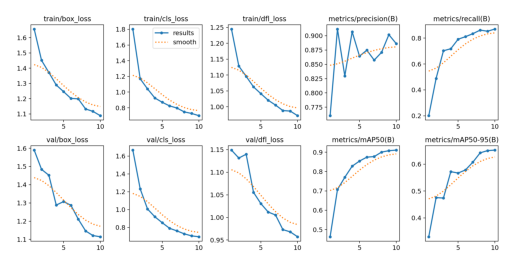

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def display_image(image_path):
    image = Image.open(image_path)  
    plt.imshow(image)  
    plt.axis("off")  
    plt.show()

image_path = r"runs\detect\train3\results.png"  # Replace with your image path
display_image(image_path)


Here I just imported the trained YOLO model and defined 3 random images and colors for visualization where the RED color is for the Ground_truth boxes and the GREEN oneis for the Predicted_Boxes

In [25]:
from ultralytics import YOLO  

model = YOLO("runs/detect/train3/weights/best.pt")

test_images_path = "val/images"  
test_labels_path = "val/labels"  

image_files = [f for f in os.listdir(test_images_path) if f.endswith('.tif')]

random_images = random.sample(image_files, 3)

GT_COLOR = (0, 255, 0)  
PRED_COLOR = (0, 0, 255)  


The read_yolo_labels function reads YOLO bounding boxes from a file through the standard procedure. The yolo_to_pixel function converts these boxes from YOLO format to pixel coordinates using the image size, making them usable for visualization.

In [26]:
def read_yolo_labels(label_path):
    boxes = []
    with open(label_path, "r") as f:
        lines = f.readlines()
        for line in lines:
            parts = line.strip().split()
            x_center, y_center, w, h = map(float, parts[1:])
            boxes.append((x_center, y_center, w, h))
    return boxes

def yolo_to_pixel(boxes, img_w, img_h):
    pixel_boxes = []
    for box in boxes:
        x_c, y_c, w, h = box
        x1 = int((x_c - w / 2) * img_w)
        y1 = int((y_c - h / 2) * img_h)
        x2 = int((x_c + w / 2) * img_w)
        y2 = int((y_c + h / 2) * img_h)
        pixel_boxes.append((x1, y1, x2, y2))
    return pixel_boxes

This code loads test images and their YOLO annotations form the raqndom images generated, converts their bounding boxes to pixel coordinates, and draws them on the image. It then runs the YOLO model for predictions, draws the predicted boxes, and displays the final image with both ground truth and predicted bounding boxes.

From this we can see that the predicted boxes and the ground truth boxes are matching very much.


image 1/1 d:\SRIP\val\images\solarpanels_native_3__x0_11789_y0_9026_dxdy_416.tif: 416x416 51 solar_panels, 149.7ms
Speed: 2.2ms preprocess, 149.7ms inference, 11.0ms postprocess per image at shape (1, 3, 416, 416)


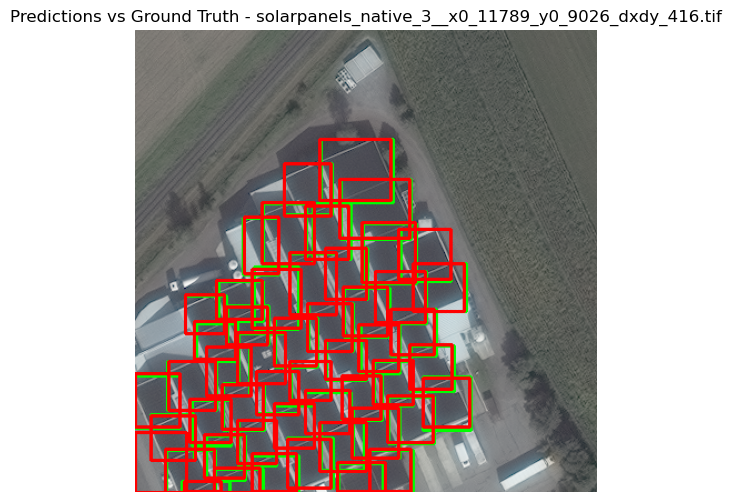


image 1/1 d:\SRIP\val\images\solarpanels_native_3__x0_5234_y0_13178_dxdy_416.tif: 416x416 9 solar_panels, 115.5ms
Speed: 6.5ms preprocess, 115.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)


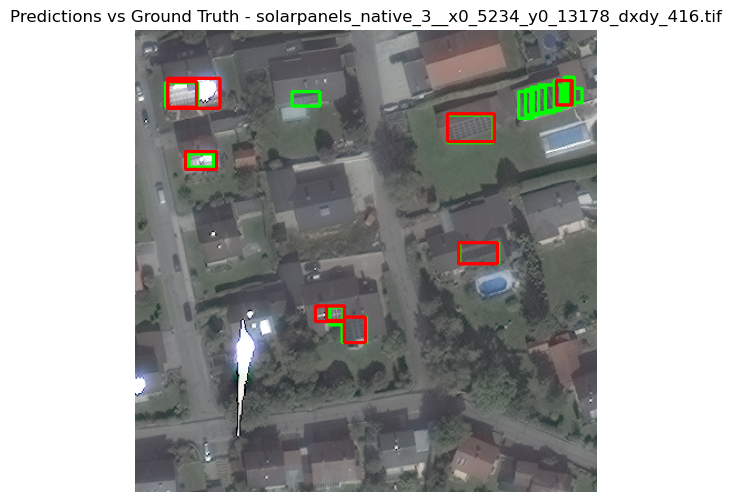


image 1/1 d:\SRIP\val\images\solarpanels_native_2__x0_764_y0_10437_dxdy_416.tif: 416x416 63 solar_panels, 188.7ms
Speed: 1.6ms preprocess, 188.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)


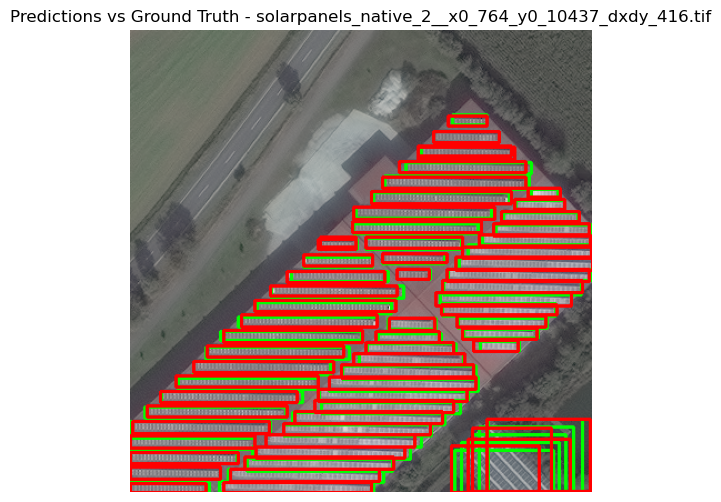

In [27]:
import cv2
for image_name in random_images:
    image_path = os.path.join(test_images_path, image_name)
    label_path = os.path.join(test_labels_path, image_name.replace(".tif", ".txt"))
    
    image = cv2.imread(image_path)
    h, w, _ = image.shape
    
    if os.path.exists(label_path):
        gt_boxes = read_yolo_labels(label_path)
        gt_boxes = yolo_to_pixel(gt_boxes, w, h)
        for (x1, y1, x2, y2) in gt_boxes:
            cv2.rectangle(image, (x1, y1), (x2, y2), GT_COLOR, 2)

    results = model(image_path)
    for result in results:
        for box in result.boxes.xyxy:
            x1, y1, x2, y2 = map(int, box[:4])
            cv2.rectangle(image, (x1, y1), (x2, y2), PRED_COLOR, 2)

    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Predictions vs Ground Truth - {image_name}")
    plt.axis("off")
    plt.show()


In [23]:
from tqdm import tqdm
import supervision as sv  

TEST_IMAGES_PATH = "val\images"
GT_LABELS_PATH = "val\labels"
model = YOLO("runs/detect/train3/weights/best.pt")


The below function reads YOLO annotation files and then extract bounding boxes from them and convert them from normalized values to pixel coordinates using the image dimensions. It also includes the class label for each box and returns the result as a NumPy array.

In [21]:
# Function to read YOLO format labels and convert them to pixel coordinates
def read_yolo_labels(label_path, img_w, img_h):
    boxes = []
    with open(label_path, 'r') as file:
        for line in file.readlines():
            values = line.strip().split()
            if len(values) == 5:
                category, x_c, y_c, w, h = map(float, values)
                x1 = int((x_c - w / 2) * img_w)
                y1 = int((y_c - h / 2) * img_h)
                x2 = int((x_c + w / 2) * img_w)
                y2 = int((y_c + h / 2) * img_h)
                boxes.append([x1, y1, x2, y2, int(category)])
    return np.array(boxes)


This code reads images and their corresponding YOLO annotation files from the val folder, converts the labels into pixel coordinates, and stores them in the all ground truths list. The model then makes predictions on the images, extract the bounding boxes, confidence scores, and class labels, form them and store them in all predictions to make them use in confusion matrix and AP50 calculations

In [24]:
all_predictions = []
all_ground_truths = []

image_files = [f for f in os.listdir(TEST_IMAGES_PATH) if f.endswith('.tif')]

for img_file in tqdm(image_files, desc="Evaluating"):
    img_path = os.path.join(TEST_IMAGES_PATH, img_file)
    label_path = os.path.join(GT_LABELS_PATH, img_file.replace(".tif", ".txt"))

    image = cv2.imread(img_path)
    original_h, original_w, _ = image.shape

    if os.path.exists(label_path):
        gt_boxes = read_yolo_labels(label_path, original_w, original_h)
        all_ground_truths.append(sv.Detections(xyxy=gt_boxes[:, :4], class_id=gt_boxes[:, 4]))

    results = model(img_path, imgsz=416, conf=0.25)
    for result in results:
        if result.boxes is not None:
            pred_boxes = result.boxes.xyxy.cpu().numpy()  
            pred_scores = result.boxes.conf.cpu().numpy()  
            pred_classes = result.boxes.cls.cpu().numpy()  
            detections = sv.Detections(xyxy=pred_boxes, confidence=pred_scores, class_id=pred_classes)
            all_predictions.append(detections)

Evaluating:   0%|                                                                              | 0/434 [00:00<?, ?it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_0_y0_7119_dxdy_416.tif: 416x416 22 solar_panels, 146.9ms
Speed: 2.1ms preprocess, 146.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   0%|▏                                                                     | 1/434 [00:02<15:03,  2.09s/it]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_0_y0_7303_dxdy_416.tif: 416x416 11 solar_panels, 118.7ms
Speed: 1.7ms preprocess, 118.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   0%|▎                                                                     | 2/434 [00:02<06:44,  1.07it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_0_y0_7950_dxdy_416.tif: 416x416 7 solar_panels, 128.7ms
Speed: 1.3ms preprocess, 128.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   1%|▍                                                                     | 3/434 [00:02<04:08,  1.73it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_10056_y0_10656_dxdy_416.tif: 416x416 9 solar_panels, 144.7ms
Speed: 1.7ms preprocess, 144.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   1%|▋                                                                     | 4/434 [00:02<02:55,  2.45it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_10380_y0_12987_dxdy_416.tif: 416x416 1 solar_panel, 155.6ms
Speed: 1.5ms preprocess, 155.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   1%|▊                                                                     | 5/434 [00:02<02:19,  3.07it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1039_y0_7477_dxdy_416.tif: 416x416 11 solar_panels, 146.7ms
Speed: 1.4ms preprocess, 146.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   1%|▉                                                                     | 6/434 [00:02<01:55,  3.69it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1047_y0_8876_dxdy_416.tif: 416x416 12 solar_panels, 135.3ms
Speed: 1.5ms preprocess, 135.3ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   2%|█▏                                                                    | 7/434 [00:03<01:39,  4.28it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_10683_y0_744_dxdy_416.tif: 416x416 6 solar_panels, 114.5ms
Speed: 1.8ms preprocess, 114.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   2%|█▎                                                                    | 8/434 [00:03<01:24,  5.03it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1073_y0_8078_dxdy_416.tif: 416x416 7 solar_panels, 133.6ms
Speed: 1.3ms preprocess, 133.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   2%|█▍                                                                    | 9/434 [00:03<01:15,  5.60it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1074_y0_7489_dxdy_416.tif: 416x416 15 solar_panels, 140.2ms
Speed: 1.6ms preprocess, 140.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   2%|█▌                                                                   | 10/434 [00:03<01:13,  5.74it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1154_y0_6251_dxdy_416.tif: 416x416 14 solar_panels, 131.8ms
Speed: 1.4ms preprocess, 131.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   3%|█▋                                                                   | 11/434 [00:03<01:09,  6.07it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_11654_y0_2790_dxdy_416.tif: 416x416 1 solar_panel, 131.5ms
Speed: 1.4ms preprocess, 131.5ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   3%|█▉                                                                   | 12/434 [00:03<01:07,  6.24it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_12327_y0_13992_dxdy_416.tif: 416x416 2 solar_panels, 129.3ms
Speed: 1.6ms preprocess, 129.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   3%|██                                                                   | 13/434 [00:03<01:04,  6.49it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_12812_y0_14096_dxdy_416.tif: 416x416 1 solar_panel, 140.1ms
Speed: 1.4ms preprocess, 140.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   3%|██▏                                                                  | 14/434 [00:04<01:04,  6.56it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_13014_y0_14042_dxdy_416.tif: 416x416 5 solar_panels, 292.2ms
Speed: 2.9ms preprocess, 292.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   3%|██▍                                                                  | 15/434 [00:04<01:23,  5.00it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_13084_y0_14026_dxdy_416.tif: 416x416 6 solar_panels, 237.2ms
Speed: 3.5ms preprocess, 237.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   4%|██▌                                                                  | 16/434 [00:04<01:31,  4.59it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_13161_y0_13952_dxdy_416.tif: 416x416 8 solar_panels, 138.0ms
Speed: 2.0ms preprocess, 138.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   4%|██▋                                                                  | 17/434 [00:04<01:22,  5.08it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_13171_y0_13861_dxdy_416.tif: 416x416 9 solar_panels, 185.4ms
Speed: 1.8ms preprocess, 185.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   4%|██▊                                                                  | 18/434 [00:04<01:23,  4.97it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_13201_y0_14023_dxdy_416.tif: 416x416 5 solar_panels, 288.8ms
Speed: 3.4ms preprocess, 288.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   4%|███                                                                  | 19/434 [00:05<01:35,  4.34it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1348_y0_9316_dxdy_416.tif: 416x416 10 solar_panels, 276.5ms
Speed: 3.5ms preprocess, 276.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   5%|███▏                                                                 | 20/434 [00:05<01:44,  3.94it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1409_y0_8622_dxdy_416.tif: 416x416 4 solar_panels, 275.8ms
Speed: 3.7ms preprocess, 275.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   5%|███▎                                                                 | 21/434 [00:05<01:49,  3.76it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1475_y0_7588_dxdy_416.tif: 416x416 7 solar_panels, 270.5ms
Speed: 3.5ms preprocess, 270.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   5%|███▍                                                                 | 22/434 [00:06<01:53,  3.64it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1498_y0_9554_dxdy_416.tif: 416x416 8 solar_panels, 227.7ms
Speed: 2.6ms preprocess, 227.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   5%|███▋                                                                 | 23/434 [00:06<01:47,  3.82it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1501_y0_10325_dxdy_416.tif: 416x416 2 solar_panels, 288.8ms
Speed: 4.0ms preprocess, 288.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   6%|███▊                                                                 | 24/434 [00:06<01:53,  3.62it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1511_y0_9177_dxdy_416.tif: 416x416 11 solar_panels, 287.8ms
Speed: 3.7ms preprocess, 287.8ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   6%|███▉                                                                 | 25/434 [00:06<01:57,  3.49it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1536_y0_10086_dxdy_416.tif: 416x416 6 solar_panels, 238.4ms
Speed: 3.3ms preprocess, 238.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   6%|████▏                                                                | 26/434 [00:07<01:54,  3.57it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1559_y0_6448_dxdy_416.tif: 416x416 14 solar_panels, 266.2ms
Speed: 3.7ms preprocess, 266.2ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   6%|████▎                                                                | 27/434 [00:07<01:56,  3.50it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1611_y0_9874_dxdy_416.tif: 416x416 6 solar_panels, 239.1ms
Speed: 3.8ms preprocess, 239.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   6%|████▍                                                                | 28/434 [00:07<01:53,  3.58it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1623_y0_6705_dxdy_416.tif: 416x416 10 solar_panels, 276.8ms
Speed: 3.0ms preprocess, 276.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   7%|████▌                                                                | 29/434 [00:08<01:54,  3.54it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1632_y0_8975_dxdy_416.tif: 416x416 10 solar_panels, 296.2ms
Speed: 3.0ms preprocess, 296.2ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   7%|████▊                                                                | 30/434 [00:08<01:57,  3.43it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1762_y0_7503_dxdy_416.tif: 416x416 1 solar_panel, 273.8ms
Speed: 2.8ms preprocess, 273.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   7%|████▉                                                                | 31/434 [00:08<01:58,  3.40it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1951_y0_7656_dxdy_416.tif: 416x416 2 solar_panels, 314.3ms
Speed: 2.9ms preprocess, 314.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   7%|█████                                                                | 32/434 [00:09<02:03,  3.27it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_1979_y0_9543_dxdy_416.tif: 416x416 6 solar_panels, 290.7ms
Speed: 3.2ms preprocess, 290.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   8%|█████▏                                                               | 33/434 [00:09<02:03,  3.25it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_2144_y0_6103_dxdy_416.tif: 416x416 10 solar_panels, 259.1ms
Speed: 3.9ms preprocess, 259.1ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   8%|█████▍                                                               | 34/434 [00:09<01:59,  3.35it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_2148_y0_6315_dxdy_416.tif: 416x416 13 solar_panels, 301.2ms
Speed: 3.3ms preprocess, 301.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   8%|█████▌                                                               | 35/434 [00:09<02:00,  3.32it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_2191_y0_6096_dxdy_416.tif: 416x416 12 solar_panels, 285.5ms
Speed: 3.5ms preprocess, 285.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   8%|█████▋                                                               | 36/434 [00:10<02:02,  3.26it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_2199_y0_6052_dxdy_416.tif: 416x416 10 solar_panels, 276.5ms
Speed: 3.0ms preprocess, 276.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   9%|█████▉                                                               | 37/434 [00:10<02:00,  3.29it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_2208_y0_7134_dxdy_416.tif: 416x416 9 solar_panels, 256.6ms
Speed: 3.2ms preprocess, 256.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   9%|██████                                                               | 38/434 [00:10<01:57,  3.38it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_2353_y0_7042_dxdy_416.tif: 416x416 6 solar_panels, 288.0ms
Speed: 2.8ms preprocess, 288.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   9%|██████▏                                                              | 39/434 [00:11<01:56,  3.39it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_2362_y0_8220_dxdy_416.tif: 416x416 12 solar_panels, 245.1ms
Speed: 2.8ms preprocess, 245.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   9%|██████▎                                                              | 40/434 [00:11<01:54,  3.45it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_2472_y0_10223_dxdy_416.tif: 416x416 5 solar_panels, 287.1ms
Speed: 2.8ms preprocess, 287.1ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:   9%|██████▌                                                              | 41/434 [00:11<01:56,  3.39it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_2480_y0_10247_dxdy_416.tif: 416x416 7 solar_panels, 281.9ms
Speed: 3.4ms preprocess, 281.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  10%|██████▋                                                              | 42/434 [00:12<01:56,  3.36it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_2527_y0_9400_dxdy_416.tif: 416x416 4 solar_panels, 268.9ms
Speed: 2.8ms preprocess, 268.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  10%|██████▊                                                              | 43/434 [00:12<01:55,  3.39it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_2686_y0_9654_dxdy_416.tif: 416x416 8 solar_panels, 275.5ms
Speed: 3.8ms preprocess, 275.5ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  10%|██████▉                                                              | 44/434 [00:12<01:55,  3.38it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_2781_y0_10550_dxdy_416.tif: 416x416 6 solar_panels, 259.5ms
Speed: 3.8ms preprocess, 259.5ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  10%|███████▏                                                             | 45/434 [00:12<01:53,  3.43it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_2870_y0_10245_dxdy_416.tif: 416x416 11 solar_panels, 286.2ms
Speed: 3.2ms preprocess, 286.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  11%|███████▎                                                             | 46/434 [00:13<01:54,  3.38it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_2884_y0_7809_dxdy_416.tif: 416x416 7 solar_panels, 251.3ms
Speed: 3.4ms preprocess, 251.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  11%|███████▍                                                             | 47/434 [00:13<01:49,  3.52it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_2964_y0_10181_dxdy_416.tif: 416x416 17 solar_panels, 221.0ms
Speed: 3.0ms preprocess, 221.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  11%|███████▋                                                             | 48/434 [00:13<01:45,  3.66it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3000_y0_10116_dxdy_416.tif: 416x416 12 solar_panels, 302.0ms
Speed: 3.3ms preprocess, 302.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  11%|███████▊                                                             | 49/434 [00:14<01:51,  3.44it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3061_y0_8047_dxdy_416.tif: 416x416 4 solar_panels, 290.5ms
Speed: 3.4ms preprocess, 290.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  12%|███████▉                                                             | 50/434 [00:14<01:52,  3.43it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3263_y0_10035_dxdy_416.tif: 416x416 10 solar_panels, 286.9ms
Speed: 3.5ms preprocess, 286.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  12%|████████                                                             | 51/434 [00:14<01:53,  3.36it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3298_y0_13099_dxdy_416.tif: 416x416 14 solar_panels, 272.0ms
Speed: 3.8ms preprocess, 272.0ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  12%|████████▎                                                            | 52/434 [00:14<01:53,  3.37it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_338_y0_7199_dxdy_416.tif: 416x416 13 solar_panels, 271.8ms
Speed: 3.9ms preprocess, 271.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  12%|████████▍                                                            | 53/434 [00:15<01:52,  3.37it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3399_y0_3232_dxdy_416.tif: 416x416 3 solar_panels, 211.3ms
Speed: 2.5ms preprocess, 211.3ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  12%|████████▌                                                            | 54/434 [00:15<01:46,  3.58it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3442_y0_12860_dxdy_416.tif: 416x416 12 solar_panels, 198.5ms
Speed: 2.9ms preprocess, 198.5ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  13%|████████▋                                                            | 55/434 [00:15<01:38,  3.84it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3467_y0_13064_dxdy_416.tif: 416x416 18 solar_panels, 234.9ms
Speed: 2.5ms preprocess, 234.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  13%|████████▉                                                            | 56/434 [00:15<01:36,  3.91it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3527_y0_12978_dxdy_416.tif: 416x416 19 solar_panels, 181.3ms
Speed: 2.8ms preprocess, 181.3ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  13%|█████████                                                            | 57/434 [00:16<01:29,  4.20it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3625_y0_10789_dxdy_416.tif: 416x416 8 solar_panels, 164.9ms
Speed: 2.4ms preprocess, 164.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  13%|█████████▏                                                           | 58/434 [00:16<01:25,  4.42it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3637_y0_13128_dxdy_416.tif: 416x416 17 solar_panels, 219.6ms
Speed: 2.3ms preprocess, 219.6ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  14%|█████████▍                                                           | 59/434 [00:16<01:26,  4.36it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3641_y0_11884_dxdy_416.tif: 416x416 4 solar_panels, 299.8ms
Speed: 3.5ms preprocess, 299.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  14%|█████████▌                                                           | 60/434 [00:16<01:35,  3.90it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_366_y0_7369_dxdy_416.tif: 416x416 10 solar_panels, 252.9ms
Speed: 3.6ms preprocess, 252.9ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  14%|█████████▋                                                           | 61/434 [00:17<01:37,  3.84it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3732_y0_11631_dxdy_416.tif: 416x416 19 solar_panels, 170.6ms
Speed: 3.0ms preprocess, 170.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  14%|█████████▊                                                           | 62/434 [00:17<01:28,  4.22it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3800_y0_13763_dxdy_416.tif: 416x416 3 solar_panels, 171.5ms
Speed: 2.0ms preprocess, 171.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  15%|██████████                                                           | 63/434 [00:17<01:23,  4.43it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3802_y0_11549_dxdy_416.tif: 416x416 21 solar_panels, 231.6ms
Speed: 2.5ms preprocess, 231.6ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  15%|██████████▏                                                          | 64/434 [00:17<01:25,  4.35it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3802_y0_12460_dxdy_416.tif: 416x416 12 solar_panels, 290.0ms
Speed: 3.7ms preprocess, 290.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  15%|██████████▎                                                          | 65/434 [00:18<01:33,  3.95it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3804_y0_11584_dxdy_416.tif: 416x416 17 solar_panels, 214.9ms
Speed: 3.6ms preprocess, 214.9ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  15%|██████████▍                                                          | 66/434 [00:18<01:32,  3.98it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3829_y0_11344_dxdy_416.tif: 416x416 2 solar_panels, 254.1ms
Speed: 2.9ms preprocess, 254.1ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  15%|██████████▋                                                          | 67/434 [00:18<01:34,  3.87it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_3832_y0_11682_dxdy_416.tif: 416x416 26 solar_panels, 290.7ms
Speed: 2.9ms preprocess, 290.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  16%|██████████▊                                                          | 68/434 [00:18<01:39,  3.67it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_392_y0_6994_dxdy_416.tif: 416x416 6 solar_panels, 283.8ms
Speed: 3.5ms preprocess, 283.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  16%|██████████▉                                                          | 69/434 [00:19<01:43,  3.54it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_402_y0_7433_dxdy_416.tif: 416x416 9 solar_panels, 213.6ms
Speed: 2.6ms preprocess, 213.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  16%|███████████▏                                                         | 70/434 [00:19<01:37,  3.72it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_4046_y0_12042_dxdy_416.tif: 416x416 11 solar_panels, 275.4ms
Speed: 3.9ms preprocess, 275.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  16%|███████████▎                                                         | 71/434 [00:19<01:40,  3.60it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_4174_y0_13123_dxdy_416.tif: 416x416 16 solar_panels, 280.4ms
Speed: 3.4ms preprocess, 280.4ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  17%|███████████▍                                                         | 72/434 [00:20<01:42,  3.52it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_4316_y0_10967_dxdy_416.tif: 416x416 7 solar_panels, 276.7ms
Speed: 3.5ms preprocess, 276.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  17%|███████████▌                                                         | 73/434 [00:20<01:44,  3.47it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_434_y0_8554_dxdy_416.tif: 416x416 6 solar_panels, 261.0ms
Speed: 4.0ms preprocess, 261.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  17%|███████████▊                                                         | 74/434 [00:20<01:43,  3.48it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_4369_y0_11676_dxdy_416.tif: 416x416 10 solar_panels, 246.2ms
Speed: 2.8ms preprocess, 246.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  17%|███████████▉                                                         | 75/434 [00:20<01:40,  3.56it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_4401_y0_6503_dxdy_416.tif: 416x416 6 solar_panels, 282.1ms
Speed: 3.6ms preprocess, 282.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  18%|████████████                                                         | 76/434 [00:21<01:41,  3.51it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_4479_y0_10552_dxdy_416.tif: 416x416 3 solar_panels, 282.3ms
Speed: 4.1ms preprocess, 282.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  18%|████████████▏                                                        | 77/434 [00:21<01:43,  3.44it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_4503_y0_11592_dxdy_416.tif: 416x416 15 solar_panels, 210.1ms
Speed: 3.7ms preprocess, 210.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  18%|████████████▍                                                        | 78/434 [00:21<01:37,  3.64it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_4526_y0_11648_dxdy_416.tif: 416x416 13 solar_panels, 294.1ms
Speed: 2.9ms preprocess, 294.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  18%|████████████▌                                                        | 79/434 [00:22<01:41,  3.48it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_4546_y0_11595_dxdy_416.tif: 416x416 15 solar_panels, 270.0ms
Speed: 3.9ms preprocess, 270.0ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  18%|████████████▋                                                        | 80/434 [00:22<01:41,  3.47it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_462_y0_7637_dxdy_416.tif: 416x416 6 solar_panels, 189.1ms
Speed: 3.0ms preprocess, 189.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  19%|████████████▉                                                        | 81/434 [00:22<01:32,  3.81it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_4643_y0_11705_dxdy_416.tif: 416x416 12 solar_panels, 288.9ms
Speed: 3.8ms preprocess, 288.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  19%|█████████████                                                        | 82/434 [00:22<01:37,  3.59it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_4690_y0_11240_dxdy_416.tif: 416x416 6 solar_panels, 290.0ms
Speed: 3.5ms preprocess, 290.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  19%|█████████████▏                                                       | 83/434 [00:23<01:41,  3.46it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_4692_y0_6758_dxdy_416.tif: 416x416 2 solar_panels, 273.7ms
Speed: 4.2ms preprocess, 273.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  19%|█████████████▎                                                       | 84/434 [00:23<01:41,  3.44it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_4777_y0_5990_dxdy_416.tif: 416x416 9 solar_panels, 270.1ms
Speed: 3.7ms preprocess, 270.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  20%|█████████████▌                                                       | 85/434 [00:23<01:41,  3.43it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_4785_y0_11329_dxdy_416.tif: 416x416 10 solar_panels, 210.5ms
Speed: 3.6ms preprocess, 210.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  20%|█████████████▋                                                       | 86/434 [00:23<01:33,  3.72it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_4944_y0_5896_dxdy_416.tif: 416x416 9 solar_panels, 286.2ms
Speed: 4.3ms preprocess, 286.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  20%|█████████████▊                                                       | 87/434 [00:24<01:39,  3.50it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_5183_y0_7049_dxdy_416.tif: 416x416 2 solar_panels, 276.8ms
Speed: 4.4ms preprocess, 276.8ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  20%|█████████████▉                                                       | 88/434 [00:24<01:40,  3.46it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_5200_y0_12763_dxdy_416.tif: 416x416 5 solar_panels, 273.9ms
Speed: 4.0ms preprocess, 273.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  21%|██████████████▏                                                      | 89/434 [00:24<01:40,  3.42it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_538_y0_7295_dxdy_416.tif: 416x416 9 solar_panels, 287.9ms
Speed: 3.4ms preprocess, 287.9ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  21%|██████████████▎                                                      | 90/434 [00:25<01:42,  3.37it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_5392_y0_13360_dxdy_416.tif: 416x416 8 solar_panels, 202.0ms
Speed: 2.7ms preprocess, 202.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  21%|██████████████▍                                                      | 91/434 [00:25<01:33,  3.66it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_5538_y0_13317_dxdy_416.tif: 416x416 6 solar_panels, 277.2ms
Speed: 3.5ms preprocess, 277.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  21%|██████████████▋                                                      | 92/434 [00:25<01:36,  3.56it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_5697_y0_13057_dxdy_416.tif: 416x416 5 solar_panels, 277.3ms
Speed: 3.9ms preprocess, 277.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  21%|██████████████▊                                                      | 93/434 [00:26<01:37,  3.50it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_576_y0_7213_dxdy_416.tif: 416x416 6 solar_panels, 275.6ms
Speed: 3.4ms preprocess, 275.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  22%|██████████████▉                                                      | 94/434 [00:26<01:38,  3.46it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_5833_y0_12068_dxdy_416.tif: 416x416 5 solar_panels, 212.9ms
Speed: 3.8ms preprocess, 212.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  22%|███████████████                                                      | 95/434 [00:26<01:32,  3.66it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_5848_y0_13294_dxdy_416.tif: 416x416 11 solar_panels, 281.8ms
Speed: 3.4ms preprocess, 281.8ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  22%|███████████████▎                                                     | 96/434 [00:26<01:35,  3.55it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_5905_y0_11555_dxdy_416.tif: 416x416 (no detections), 216.9ms
Speed: 3.8ms preprocess, 216.9ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  22%|███████████████▍                                                     | 97/434 [00:27<01:29,  3.75it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_5989_y0_12270_dxdy_416.tif: 416x416 9 solar_panels, 278.7ms
Speed: 3.5ms preprocess, 278.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  23%|███████████████▌                                                     | 98/434 [00:27<01:33,  3.61it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_6034_y0_12096_dxdy_416.tif: 416x416 9 solar_panels, 270.5ms
Speed: 3.0ms preprocess, 270.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  23%|███████████████▋                                                     | 99/434 [00:27<01:33,  3.59it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_6570_y0_12065_dxdy_416.tif: 416x416 30 solar_panels, 274.4ms
Speed: 3.3ms preprocess, 274.4ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  23%|███████████████▋                                                    | 100/434 [00:27<01:34,  3.54it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_6625_y0_12006_dxdy_416.tif: 416x416 13 solar_panels, 264.8ms
Speed: 3.1ms preprocess, 264.8ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  23%|███████████████▊                                                    | 101/434 [00:28<01:35,  3.48it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_6627_y0_8649_dxdy_416.tif: 416x416 10 solar_panels, 262.6ms
Speed: 4.1ms preprocess, 262.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  24%|███████████████▉                                                    | 102/434 [00:28<01:35,  3.49it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_6660_y0_11051_dxdy_416.tif: 416x416 10 solar_panels, 237.8ms
Speed: 3.0ms preprocess, 237.8ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  24%|████████████████▏                                                   | 103/434 [00:28<01:31,  3.63it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_6670_y0_8983_dxdy_416.tif: 416x416 13 solar_panels, 286.1ms
Speed: 3.3ms preprocess, 286.1ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  24%|████████████████▎                                                   | 104/434 [00:29<01:35,  3.47it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_6685_y0_6186_dxdy_416.tif: 416x416 2 solar_panels, 215.8ms
Speed: 3.1ms preprocess, 215.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  24%|████████████████▍                                                   | 105/434 [00:29<01:29,  3.67it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_6704_y0_12309_dxdy_416.tif: 416x416 43 solar_panels, 269.8ms
Speed: 3.1ms preprocess, 269.8ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  24%|████████████████▌                                                   | 106/434 [00:29<01:31,  3.59it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_6724_y0_12292_dxdy_416.tif: 416x416 42 solar_panels, 249.1ms
Speed: 3.7ms preprocess, 249.1ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  25%|████████████████▊                                                   | 107/434 [00:29<01:29,  3.65it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_6785_y0_12321_dxdy_416.tif: 416x416 39 solar_panels, 287.3ms
Speed: 3.3ms preprocess, 287.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  25%|████████████████▉                                                   | 108/434 [00:30<01:32,  3.53it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_689_y0_6617_dxdy_416.tif: 416x416 2 solar_panels, 220.3ms
Speed: 3.3ms preprocess, 220.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  25%|█████████████████                                                   | 109/434 [00:30<01:28,  3.65it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_6969_y0_12601_dxdy_416.tif: 416x416 5 solar_panels, 294.9ms
Speed: 3.5ms preprocess, 294.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  25%|█████████████████▏                                                  | 110/434 [00:30<01:32,  3.49it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_7021_y0_9724_dxdy_416.tif: 416x416 17 solar_panels, 225.3ms
Speed: 3.2ms preprocess, 225.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  26%|█████████████████▍                                                  | 111/434 [00:31<01:28,  3.65it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_7083_y0_9790_dxdy_416.tif: 416x416 16 solar_panels, 272.8ms
Speed: 3.7ms preprocess, 272.8ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  26%|█████████████████▌                                                  | 112/434 [00:31<01:30,  3.56it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_7319_y0_9441_dxdy_416.tif: 416x416 10 solar_panels, 235.4ms
Speed: 3.6ms preprocess, 235.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  26%|█████████████████▋                                                  | 113/434 [00:31<01:26,  3.69it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_7372_y0_12937_dxdy_416.tif: 416x416 4 solar_panels, 288.8ms
Speed: 3.6ms preprocess, 288.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  26%|█████████████████▊                                                  | 114/434 [00:31<01:30,  3.53it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_7488_y0_512_dxdy_416.tif: 416x416 2 solar_panels, 274.6ms
Speed: 3.0ms preprocess, 274.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  26%|██████████████████                                                  | 115/434 [00:32<01:30,  3.52it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_7519_y0_8486_dxdy_416.tif: 416x416 3 solar_panels, 274.5ms
Speed: 4.0ms preprocess, 274.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  27%|██████████████████▏                                                 | 116/434 [00:32<01:32,  3.43it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_7521_y0_9306_dxdy_416.tif: 416x416 5 solar_panels, 274.0ms
Speed: 3.4ms preprocess, 274.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  27%|██████████████████▎                                                 | 117/434 [00:32<01:31,  3.45it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_7601_y0_8456_dxdy_416.tif: 416x416 2 solar_panels, 297.2ms
Speed: 4.3ms preprocess, 297.2ms inference, 15.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  27%|██████████████████▍                                                 | 118/434 [00:33<01:35,  3.30it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_7603_y0_9742_dxdy_416.tif: 416x416 12 solar_panels, 242.1ms
Speed: 3.4ms preprocess, 242.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  27%|██████████████████▋                                                 | 119/434 [00:33<01:32,  3.42it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_7615_y0_8412_dxdy_416.tif: 416x416 2 solar_panels, 279.0ms
Speed: 3.7ms preprocess, 279.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  28%|██████████████████▊                                                 | 120/434 [00:33<01:32,  3.39it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_7786_y0_11517_dxdy_416.tif: 416x416 8 solar_panels, 233.6ms
Speed: 3.6ms preprocess, 233.6ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  28%|██████████████████▉                                                 | 121/434 [00:33<01:28,  3.52it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_7868_y0_8363_dxdy_416.tif: 416x416 30 solar_panels, 292.1ms
Speed: 3.6ms preprocess, 292.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  28%|███████████████████                                                 | 122/434 [00:34<01:31,  3.42it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_7875_y0_8280_dxdy_416.tif: 416x416 32 solar_panels, 250.5ms
Speed: 4.2ms preprocess, 250.5ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  28%|███████████████████▎                                                | 123/434 [00:34<01:29,  3.49it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_7877_y0_11703_dxdy_416.tif: 416x416 8 solar_panels, 274.3ms
Speed: 3.6ms preprocess, 274.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  29%|███████████████████▍                                                | 124/434 [00:34<01:29,  3.46it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_7897_y0_10358_dxdy_416.tif: 416x416 8 solar_panels, 275.0ms
Speed: 4.6ms preprocess, 275.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  29%|███████████████████▌                                                | 125/434 [00:35<01:29,  3.44it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_7_y0_6959_dxdy_416.tif: 416x416 13 solar_panels, 283.6ms
Speed: 3.7ms preprocess, 283.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  29%|███████████████████▋                                                | 126/434 [00:35<01:30,  3.42it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8028_y0_12609_dxdy_416.tif: 416x416 1 solar_panel, 273.6ms
Speed: 3.2ms preprocess, 273.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  29%|███████████████████▉                                                | 127/434 [00:35<01:30,  3.38it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8119_y0_12186_dxdy_416.tif: 416x416 27 solar_panels, 252.5ms
Speed: 3.5ms preprocess, 252.5ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  29%|████████████████████                                                | 128/434 [00:35<01:28,  3.46it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8123_y0_8023_dxdy_416.tif: 416x416 1 solar_panel, 280.9ms
Speed: 4.1ms preprocess, 280.9ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  30%|████████████████████▏                                               | 129/434 [00:36<01:29,  3.42it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8142_y0_12149_dxdy_416.tif: 416x416 23 solar_panels, 278.0ms
Speed: 3.7ms preprocess, 278.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  30%|████████████████████▎                                               | 130/434 [00:36<01:29,  3.39it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8166_y0_8730_dxdy_416.tif: 416x416 11 solar_panels, 280.4ms
Speed: 3.6ms preprocess, 280.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  30%|████████████████████▌                                               | 131/434 [00:36<01:29,  3.37it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8168_y0_12276_dxdy_416.tif: 416x416 22 solar_panels, 282.0ms
Speed: 3.5ms preprocess, 282.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  30%|████████████████████▋                                               | 132/434 [00:37<01:29,  3.36it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8210_y0_12695_dxdy_416.tif: 416x416 6 solar_panels, 236.2ms
Speed: 3.9ms preprocess, 236.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  31%|████████████████████▊                                               | 133/434 [00:37<01:25,  3.51it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8218_y0_13023_dxdy_416.tif: 416x416 4 solar_panels, 242.3ms
Speed: 3.1ms preprocess, 242.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  31%|████████████████████▉                                               | 134/434 [00:37<01:23,  3.58it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8233_y0_9890_dxdy_416.tif: 416x416 9 solar_panels, 250.3ms
Speed: 3.6ms preprocess, 250.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  31%|█████████████████████▏                                              | 135/434 [00:37<01:23,  3.58it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8271_y0_12537_dxdy_416.tif: 416x416 4 solar_panels, 273.2ms
Speed: 3.4ms preprocess, 273.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  31%|█████████████████████▎                                              | 136/434 [00:38<01:24,  3.54it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_82_y0_6947_dxdy_416.tif: 416x416 15 solar_panels, 283.0ms
Speed: 2.9ms preprocess, 283.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  32%|█████████████████████▍                                              | 137/434 [00:38<01:25,  3.47it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8357_y0_13087_dxdy_416.tif: 416x416 4 solar_panels, 268.5ms
Speed: 3.8ms preprocess, 268.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  32%|█████████████████████▌                                              | 138/434 [00:38<01:25,  3.45it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8366_y0_9849_dxdy_416.tif: 416x416 11 solar_panels, 281.2ms
Speed: 3.7ms preprocess, 281.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  32%|█████████████████████▊                                              | 139/434 [00:39<01:25,  3.44it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8393_y0_10108_dxdy_416.tif: 416x416 9 solar_panels, 290.1ms
Speed: 3.3ms preprocess, 290.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  32%|█████████████████████▉                                              | 140/434 [00:39<01:26,  3.40it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8405_y0_13882_dxdy_416.tif: 416x416 5 solar_panels, 274.0ms
Speed: 4.1ms preprocess, 274.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  32%|██████████████████████                                              | 141/434 [00:39<01:27,  3.34it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8414_y0_10290_dxdy_416.tif: 416x416 8 solar_panels, 300.3ms
Speed: 4.6ms preprocess, 300.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  33%|██████████████████████▏                                             | 142/434 [00:40<01:28,  3.29it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8419_y0_12222_dxdy_416.tif: 416x416 6 solar_panels, 283.7ms
Speed: 3.6ms preprocess, 283.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  33%|██████████████████████▍                                             | 143/434 [00:40<01:28,  3.30it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8443_y0_8558_dxdy_416.tif: 416x416 16 solar_panels, 299.3ms
Speed: 3.3ms preprocess, 299.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  33%|██████████████████████▌                                             | 144/434 [00:40<01:30,  3.21it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8450_y0_10250_dxdy_416.tif: 416x416 7 solar_panels, 281.8ms
Speed: 5.0ms preprocess, 281.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  33%|██████████████████████▋                                             | 145/434 [00:41<01:29,  3.23it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8453_y0_8015_dxdy_416.tif: 416x416 10 solar_panels, 206.0ms
Speed: 3.4ms preprocess, 206.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  34%|██████████████████████▉                                             | 146/434 [00:41<01:21,  3.55it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8463_y0_13824_dxdy_416.tif: 416x416 4 solar_panels, 288.4ms
Speed: 3.7ms preprocess, 288.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  34%|███████████████████████                                             | 147/434 [00:41<01:22,  3.46it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8468_y0_10003_dxdy_416.tif: 416x416 6 solar_panels, 253.7ms
Speed: 3.5ms preprocess, 253.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  34%|███████████████████████▏                                            | 148/434 [00:41<01:21,  3.50it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_855_y0_7084_dxdy_416.tif: 416x416 12 solar_panels, 248.8ms
Speed: 3.2ms preprocess, 248.8ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  34%|███████████████████████▎                                            | 149/434 [00:42<01:20,  3.54it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8598_y0_8885_dxdy_416.tif: 416x416 3 solar_panels, 216.7ms
Speed: 3.6ms preprocess, 216.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  35%|███████████████████████▌                                            | 150/434 [00:42<01:16,  3.72it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8608_y0_13304_dxdy_416.tif: 416x416 6 solar_panels, 281.9ms
Speed: 3.4ms preprocess, 281.9ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  35%|███████████████████████▋                                            | 151/434 [00:42<01:18,  3.59it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8628_y0_10957_dxdy_416.tif: 416x416 17 solar_panels, 280.4ms
Speed: 3.3ms preprocess, 280.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  35%|███████████████████████▊                                            | 152/434 [00:42<01:20,  3.51it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8635_y0_10963_dxdy_416.tif: 416x416 17 solar_panels, 295.5ms
Speed: 3.6ms preprocess, 295.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  35%|███████████████████████▉                                            | 153/434 [00:43<01:23,  3.38it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8688_y0_8158_dxdy_416.tif: 416x416 5 solar_panels, 255.7ms
Speed: 2.7ms preprocess, 255.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  35%|████████████████████████▏                                           | 154/434 [00:43<01:20,  3.47it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8851_y0_12238_dxdy_416.tif: 416x416 12 solar_panels, 280.6ms
Speed: 4.0ms preprocess, 280.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  36%|████████████████████████▎                                           | 155/434 [00:43<01:21,  3.42it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_8954_y0_12134_dxdy_416.tif: 416x416 10 solar_panels, 284.3ms
Speed: 3.4ms preprocess, 284.3ms inference, 4.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  36%|████████████████████████▍                                           | 156/434 [00:44<01:22,  3.38it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_9034_y0_12029_dxdy_416.tif: 416x416 7 solar_panels, 270.7ms
Speed: 3.7ms preprocess, 270.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  36%|████████████████████████▌                                           | 157/434 [00:44<01:21,  3.40it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_9074_y0_13462_dxdy_416.tif: 416x416 9 solar_panels, 265.5ms
Speed: 3.1ms preprocess, 265.5ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  36%|████████████████████████▊                                           | 158/434 [00:44<01:20,  3.42it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_9219_y0_13558_dxdy_416.tif: 416x416 2 solar_panels, 279.5ms
Speed: 3.3ms preprocess, 279.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  37%|████████████████████████▉                                           | 159/434 [00:45<01:21,  3.38it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_9390_y0_11734_dxdy_416.tif: 416x416 4 solar_panels, 304.5ms
Speed: 3.5ms preprocess, 304.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  37%|█████████████████████████                                           | 160/434 [00:45<01:22,  3.33it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_9498_y0_11008_dxdy_416.tif: 416x416 17 solar_panels, 258.6ms
Speed: 4.5ms preprocess, 258.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  37%|█████████████████████████▏                                          | 161/434 [00:45<01:21,  3.35it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_9502_y0_10952_dxdy_416.tif: 416x416 18 solar_panels, 276.3ms
Speed: 5.1ms preprocess, 276.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  37%|█████████████████████████▍                                          | 162/434 [00:45<01:21,  3.35it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_9615_y0_12885_dxdy_416.tif: 416x416 1 solar_panel, 274.6ms
Speed: 2.6ms preprocess, 274.6ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  38%|█████████████████████████▌                                          | 163/434 [00:46<01:19,  3.41it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_9658_y0_10999_dxdy_416.tif: 416x416 9 solar_panels, 264.4ms
Speed: 3.4ms preprocess, 264.4ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  38%|█████████████████████████▋                                          | 164/434 [00:46<01:19,  3.39it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_965_y0_7803_dxdy_416.tif: 416x416 14 solar_panels, 216.8ms
Speed: 3.0ms preprocess, 216.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  38%|█████████████████████████▊                                          | 165/434 [00:46<01:14,  3.61it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_977_y0_7697_dxdy_416.tif: 416x416 16 solar_panels, 265.3ms
Speed: 3.6ms preprocess, 265.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  38%|██████████████████████████                                          | 166/434 [00:47<01:14,  3.58it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_9818_y0_10582_dxdy_416.tif: 416x416 10 solar_panels, 263.2ms
Speed: 3.2ms preprocess, 263.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  38%|██████████████████████████▏                                         | 167/434 [00:47<01:15,  3.54it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_9893_y0_11129_dxdy_416.tif: 416x416 11 solar_panels, 229.7ms
Speed: 3.4ms preprocess, 229.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  39%|██████████████████████████▎                                         | 168/434 [00:47<01:12,  3.67it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_992_y0_6099_dxdy_416.tif: 416x416 7 solar_panels, 267.7ms
Speed: 4.0ms preprocess, 267.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  39%|██████████████████████████▍                                         | 169/434 [00:47<01:13,  3.63it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_1__x0_998_y0_8985_dxdy_416.tif: 416x416 9 solar_panels, 282.7ms
Speed: 3.6ms preprocess, 282.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  39%|██████████████████████████▋                                         | 170/434 [00:48<01:15,  3.49it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_0_y0_11614_dxdy_416.tif: 416x416 46 solar_panels, 279.6ms
Speed: 3.6ms preprocess, 279.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  39%|██████████████████████████▊                                         | 171/434 [00:48<01:16,  3.44it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_0_y0_11645_dxdy_416.tif: 416x416 41 solar_panels, 273.5ms
Speed: 3.7ms preprocess, 273.5ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  40%|██████████████████████████▉                                         | 172/434 [00:48<01:16,  3.42it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_10085_y0_3245_dxdy_416.tif: 416x416 11 solar_panels, 243.6ms
Speed: 3.6ms preprocess, 243.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  40%|███████████████████████████                                         | 173/434 [00:49<01:14,  3.51it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_1044_y0_8640_dxdy_416.tif: 416x416 7 solar_panels, 272.2ms
Speed: 3.3ms preprocess, 272.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  40%|███████████████████████████▎                                        | 174/434 [00:49<01:14,  3.49it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_1060_y0_8970_dxdy_416.tif: 416x416 5 solar_panels, 201.1ms
Speed: 3.4ms preprocess, 201.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  40%|███████████████████████████▍                                        | 175/434 [00:49<01:08,  3.76it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_10687_y0_7382_dxdy_416.tif: 416x416 2 solar_panels, 281.2ms
Speed: 3.9ms preprocess, 281.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  41%|███████████████████████████▌                                        | 176/434 [00:49<01:11,  3.60it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_10795_y0_9405_dxdy_416.tif: 416x416 1 solar_panel, 287.7ms
Speed: 3.3ms preprocess, 287.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  41%|███████████████████████████▋                                        | 177/434 [00:50<01:14,  3.47it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_10908_y0_7275_dxdy_416.tif: 416x416 3 solar_panels, 272.6ms
Speed: 3.7ms preprocess, 272.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  41%|███████████████████████████▉                                        | 178/434 [00:50<01:14,  3.45it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_10955_y0_12126_dxdy_416.tif: 416x416 6 solar_panels, 291.4ms
Speed: 3.5ms preprocess, 291.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  41%|████████████████████████████                                        | 179/434 [00:50<01:15,  3.37it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_10973_y0_12118_dxdy_416.tif: 416x416 7 solar_panels, 280.1ms
Speed: 3.3ms preprocess, 280.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  41%|████████████████████████████▏                                       | 180/434 [00:51<01:15,  3.36it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_1098_y0_8475_dxdy_416.tif: 416x416 8 solar_panels, 266.7ms
Speed: 2.8ms preprocess, 266.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  42%|████████████████████████████▎                                       | 181/434 [00:51<01:14,  3.41it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_11286_y0_15487_dxdy_416.tif: 416x416 4 solar_panels, 271.6ms
Speed: 3.8ms preprocess, 271.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  42%|████████████████████████████▌                                       | 182/434 [00:51<01:14,  3.40it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_12262_y0_8619_dxdy_416.tif: 416x416 2 solar_panels, 295.3ms
Speed: 3.4ms preprocess, 295.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  42%|████████████████████████████▋                                       | 183/434 [00:51<01:14,  3.36it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_13506_y0_7343_dxdy_416.tif: 416x416 1 solar_panel, 297.3ms
Speed: 3.7ms preprocess, 297.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  42%|████████████████████████████▊                                       | 184/434 [00:52<01:16,  3.26it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_15126_y0_14043_dxdy_416.tif: 416x416 5 solar_panels, 296.5ms
Speed: 3.7ms preprocess, 296.5ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  43%|████████████████████████████▉                                       | 185/434 [00:52<01:17,  3.23it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_15310_y0_13971_dxdy_416.tif: 416x416 2 solar_panels, 283.7ms
Speed: 3.5ms preprocess, 283.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  43%|█████████████████████████████▏                                      | 186/434 [00:52<01:15,  3.26it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_15635_y0_13837_dxdy_416.tif: 416x416 7 solar_panels, 262.9ms
Speed: 4.1ms preprocess, 262.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  43%|█████████████████████████████▎                                      | 187/434 [00:53<01:13,  3.34it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_15668_y0_14219_dxdy_416.tif: 416x416 10 solar_panels, 308.1ms
Speed: 3.3ms preprocess, 308.1ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  43%|█████████████████████████████▍                                      | 188/434 [00:53<01:16,  3.23it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_1716_y0_9633_dxdy_416.tif: 416x416 5 solar_panels, 286.0ms
Speed: 3.3ms preprocess, 286.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  44%|█████████████████████████████▌                                      | 189/434 [00:53<01:15,  3.26it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_1724_y0_9729_dxdy_416.tif: 416x416 4 solar_panels, 291.6ms
Speed: 3.6ms preprocess, 291.6ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  44%|█████████████████████████████▊                                      | 190/434 [00:54<01:15,  3.23it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_207_y0_11056_dxdy_416.tif: 416x416 24 solar_panels, 293.4ms
Speed: 4.1ms preprocess, 293.4ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  44%|█████████████████████████████▉                                      | 191/434 [00:54<01:16,  3.19it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_2335_y0_4472_dxdy_416.tif: 416x416 14 solar_panels, 249.3ms
Speed: 3.7ms preprocess, 249.3ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  44%|██████████████████████████████                                      | 192/434 [00:54<01:12,  3.36it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_2622_y0_4514_dxdy_416.tif: 416x416 9 solar_panels, 272.0ms
Speed: 3.9ms preprocess, 272.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  44%|██████████████████████████████▏                                     | 193/434 [00:54<01:11,  3.37it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_2636_y0_5101_dxdy_416.tif: 416x416 38 solar_panels, 283.1ms
Speed: 3.7ms preprocess, 283.1ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  45%|██████████████████████████████▍                                     | 194/434 [00:55<01:12,  3.31it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_2671_y0_5201_dxdy_416.tif: 416x416 51 solar_panels, 214.4ms
Speed: 2.5ms preprocess, 214.4ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  45%|██████████████████████████████▌                                     | 195/434 [00:55<01:07,  3.56it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_2753_y0_5166_dxdy_416.tif: 416x416 56 solar_panels, 293.9ms
Speed: 2.9ms preprocess, 293.9ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  45%|██████████████████████████████▋                                     | 196/434 [00:55<01:08,  3.47it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_2777_y0_5191_dxdy_416.tif: 416x416 55 solar_panels, 310.8ms
Speed: 2.3ms preprocess, 310.8ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  45%|██████████████████████████████▊                                     | 197/434 [00:56<01:11,  3.32it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_2809_y0_5064_dxdy_416.tif: 416x416 56 solar_panels, 446.9ms
Speed: 2.4ms preprocess, 446.9ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  46%|███████████████████████████████                                     | 198/434 [00:56<01:23,  2.84it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_2820_y0_5289_dxdy_416.tif: 416x416 45 solar_panels, 379.3ms
Speed: 3.1ms preprocess, 379.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  46%|███████████████████████████████▏                                    | 199/434 [00:57<01:25,  2.74it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_2881_y0_5192_dxdy_416.tif: 416x416 49 solar_panels, 269.6ms
Speed: 3.1ms preprocess, 269.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  46%|███████████████████████████████▎                                    | 200/434 [00:57<01:21,  2.89it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_2991_y0_5290_dxdy_416.tif: 416x416 38 solar_panels, 307.4ms
Speed: 3.1ms preprocess, 307.4ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  46%|███████████████████████████████▍                                    | 201/434 [00:57<01:18,  2.95it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_306_y0_10941_dxdy_416.tif: 416x416 35 solar_panels, 210.7ms
Speed: 2.1ms preprocess, 210.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  47%|███████████████████████████████▋                                    | 202/434 [00:57<01:11,  3.25it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_3526_y0_12873_dxdy_416.tif: 416x416 4 solar_panels, 174.9ms
Speed: 2.4ms preprocess, 174.9ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  47%|███████████████████████████████▊                                    | 203/434 [00:58<01:03,  3.66it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_3657_y0_80_dxdy_416.tif: 416x416 5 solar_panels, 175.5ms
Speed: 2.3ms preprocess, 175.5ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  47%|███████████████████████████████▉                                    | 204/434 [00:58<00:57,  4.01it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_3911_y0_5773_dxdy_416.tif: 416x416 6 solar_panels, 178.3ms
Speed: 2.2ms preprocess, 178.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  47%|████████████████████████████████                                    | 205/434 [00:58<00:52,  4.35it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_393_y0_11150_dxdy_416.tif: 416x416 41 solar_panels, 262.5ms
Speed: 3.3ms preprocess, 262.5ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  47%|████████████████████████████████▎                                   | 206/434 [00:58<00:56,  4.04it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_398_y0_10811_dxdy_416.tif: 416x416 44 solar_panels, 264.1ms
Speed: 2.6ms preprocess, 264.1ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  48%|████████████████████████████████▍                                   | 207/434 [00:59<00:58,  3.87it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_4063_y0_12511_dxdy_416.tif: 416x416 1 solar_panel, 268.3ms
Speed: 2.8ms preprocess, 268.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  48%|████████████████████████████████▌                                   | 208/434 [00:59<01:00,  3.73it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_4366_y0_13509_dxdy_416.tif: 416x416 2 solar_panels, 265.2ms
Speed: 2.5ms preprocess, 265.2ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  48%|████████████████████████████████▋                                   | 209/434 [00:59<01:01,  3.68it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_445_y0_11123_dxdy_416.tif: 416x416 36 solar_panels, 274.0ms
Speed: 2.6ms preprocess, 274.0ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  48%|████████████████████████████████▉                                   | 210/434 [00:59<01:02,  3.60it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_459_y0_10905_dxdy_416.tif: 416x416 51 solar_panels, 262.6ms
Speed: 3.3ms preprocess, 262.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  49%|█████████████████████████████████                                   | 211/434 [01:00<01:02,  3.58it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_469_y0_11129_dxdy_416.tif: 416x416 39 solar_panels, 258.4ms
Speed: 2.5ms preprocess, 258.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  49%|█████████████████████████████████▏                                  | 212/434 [01:00<01:01,  3.61it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_4715_y0_5526_dxdy_416.tif: 416x416 5 solar_panels, 262.9ms
Speed: 2.2ms preprocess, 262.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  49%|█████████████████████████████████▎                                  | 213/434 [01:00<01:01,  3.59it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_4772_y0_12177_dxdy_416.tif: 416x416 7 solar_panels, 242.4ms
Speed: 2.4ms preprocess, 242.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  49%|█████████████████████████████████▌                                  | 214/434 [01:00<00:59,  3.68it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_512_y0_11035_dxdy_416.tif: 416x416 34 solar_panels, 258.0ms
Speed: 2.7ms preprocess, 258.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  50%|█████████████████████████████████▋                                  | 215/434 [01:01<01:00,  3.63it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_5245_y0_5664_dxdy_416.tif: 416x416 13 solar_panels, 271.9ms
Speed: 2.5ms preprocess, 271.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  50%|█████████████████████████████████▊                                  | 216/434 [01:01<01:00,  3.60it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_5394_y0_6538_dxdy_416.tif: 416x416 8 solar_panels, 296.8ms
Speed: 2.4ms preprocess, 296.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  50%|██████████████████████████████████                                  | 217/434 [01:01<01:02,  3.46it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_5643_y0_5508_dxdy_416.tif: 416x416 14 solar_panels, 278.3ms
Speed: 2.4ms preprocess, 278.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  50%|██████████████████████████████████▏                                 | 218/434 [01:02<01:03,  3.38it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_565_y0_10686_dxdy_416.tif: 416x416 56 solar_panels, 246.0ms
Speed: 3.5ms preprocess, 246.0ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  50%|██████████████████████████████████▎                                 | 219/434 [01:02<01:01,  3.50it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_566_y0_11137_dxdy_416.tif: 416x416 40 solar_panels, 269.4ms
Speed: 2.3ms preprocess, 269.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  51%|██████████████████████████████████▍                                 | 220/434 [01:02<01:01,  3.49it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_567_y0_10715_dxdy_416.tif: 416x416 56 solar_panels, 274.1ms
Speed: 2.6ms preprocess, 274.1ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  51%|██████████████████████████████████▋                                 | 221/434 [01:03<01:01,  3.46it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_567_y0_11099_dxdy_416.tif: 416x416 38 solar_panels, 280.2ms
Speed: 2.3ms preprocess, 280.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  51%|██████████████████████████████████▊                                 | 222/434 [01:03<01:02,  3.42it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_5717_y0_6304_dxdy_416.tif: 416x416 2 solar_panels, 280.0ms
Speed: 2.3ms preprocess, 280.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  51%|██████████████████████████████████▉                                 | 223/434 [01:03<01:01,  3.44it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_5772_y0_5608_dxdy_416.tif: 416x416 14 solar_panels, 273.2ms
Speed: 2.5ms preprocess, 273.2ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  52%|███████████████████████████████████                                 | 224/434 [01:03<01:01,  3.41it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_5772_y0_6617_dxdy_416.tif: 416x416 5 solar_panels, 267.7ms
Speed: 2.4ms preprocess, 267.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  52%|███████████████████████████████████▎                                | 225/434 [01:04<01:00,  3.44it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_5816_y0_5494_dxdy_416.tif: 416x416 11 solar_panels, 291.4ms
Speed: 2.5ms preprocess, 291.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  52%|███████████████████████████████████▍                                | 226/434 [01:04<01:01,  3.36it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_5859_y0_5433_dxdy_416.tif: 416x416 10 solar_panels, 298.5ms
Speed: 2.8ms preprocess, 298.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  52%|███████████████████████████████████▌                                | 227/434 [01:04<01:02,  3.29it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_5890_y0_2846_dxdy_416.tif: 416x416 6 solar_panels, 283.1ms
Speed: 2.3ms preprocess, 283.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  53%|███████████████████████████████████▋                                | 228/434 [01:05<01:02,  3.30it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_5924_y0_2968_dxdy_416.tif: 416x416 6 solar_panels, 289.3ms
Speed: 2.5ms preprocess, 289.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  53%|███████████████████████████████████▉                                | 229/434 [01:05<01:02,  3.28it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_5980_y0_5654_dxdy_416.tif: 416x416 9 solar_panels, 285.6ms
Speed: 3.1ms preprocess, 285.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  53%|████████████████████████████████████                                | 230/434 [01:05<01:02,  3.28it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_6082_y0_5660_dxdy_416.tif: 416x416 3 solar_panels, 276.5ms
Speed: 2.4ms preprocess, 276.5ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  53%|████████████████████████████████████▏                               | 231/434 [01:06<01:01,  3.32it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_650_y0_10765_dxdy_416.tif: 416x416 47 solar_panels, 287.2ms
Speed: 2.5ms preprocess, 287.2ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  53%|████████████████████████████████████▎                               | 232/434 [01:06<01:01,  3.29it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_66_y0_14065_dxdy_416.tif: 416x416 13 solar_panels, 281.6ms
Speed: 2.3ms preprocess, 281.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  54%|████████████████████████████████████▌                               | 233/434 [01:06<01:00,  3.30it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_6876_y0_9926_dxdy_416.tif: 416x416 8 solar_panels, 285.1ms
Speed: 2.3ms preprocess, 285.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  54%|████████████████████████████████████▋                               | 234/434 [01:06<01:00,  3.31it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_6880_y0_9736_dxdy_416.tif: 416x416 7 solar_panels, 275.3ms
Speed: 2.6ms preprocess, 275.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  54%|████████████████████████████████████▊                               | 235/434 [01:07<00:59,  3.34it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_741_y0_10703_dxdy_416.tif: 416x416 58 solar_panels, 251.0ms
Speed: 2.5ms preprocess, 251.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  54%|████████████████████████████████████▉                               | 236/434 [01:07<00:56,  3.48it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_764_y0_10437_dxdy_416.tif: 416x416 63 solar_panels, 283.3ms
Speed: 2.4ms preprocess, 283.3ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  55%|█████████████████████████████████████▏                              | 237/434 [01:07<00:58,  3.39it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_770_y0_10677_dxdy_416.tif: 416x416 61 solar_panels, 279.1ms
Speed: 2.4ms preprocess, 279.1ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  55%|█████████████████████████████████████▎                              | 238/434 [01:08<00:57,  3.41it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_778_y0_8463_dxdy_416.tif: 416x416 4 solar_panels, 286.6ms
Speed: 2.5ms preprocess, 286.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  55%|█████████████████████████████████████▍                              | 239/434 [01:08<00:57,  3.38it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_7910_y0_2472_dxdy_416.tif: 416x416 14 solar_panels, 295.2ms
Speed: 2.4ms preprocess, 295.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  55%|█████████████████████████████████████▌                              | 240/434 [01:08<00:58,  3.31it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_792_y0_10381_dxdy_416.tif: 416x416 50 solar_panels, 297.7ms
Speed: 2.5ms preprocess, 297.7ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  56%|█████████████████████████████████████▊                              | 241/434 [01:09<00:59,  3.24it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_8043_y0_2303_dxdy_416.tif: 416x416 15 solar_panels, 284.8ms
Speed: 2.4ms preprocess, 284.8ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  56%|█████████████████████████████████████▉                              | 242/434 [01:09<00:58,  3.27it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_813_y0_10464_dxdy_416.tif: 416x416 63 solar_panels, 304.5ms
Speed: 2.7ms preprocess, 304.5ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  56%|██████████████████████████████████████                              | 243/434 [01:09<00:59,  3.20it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_81_y0_11582_dxdy_416.tif: 416x416 46 solar_panels, 278.2ms
Speed: 2.7ms preprocess, 278.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  56%|██████████████████████████████████████▏                             | 244/434 [01:09<00:58,  3.24it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_8403_y0_3920_dxdy_416.tif: 416x416 14 solar_panels, 284.1ms
Speed: 3.4ms preprocess, 284.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  56%|██████████████████████████████████████▍                             | 245/434 [01:10<00:57,  3.27it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_845_y0_10339_dxdy_416.tif: 416x416 44 solar_panels, 290.7ms
Speed: 2.6ms preprocess, 290.7ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  57%|██████████████████████████████████████▌                             | 246/434 [01:10<00:57,  3.27it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_8590_y0_2900_dxdy_416.tif: 416x416 4 solar_panels, 285.8ms
Speed: 2.4ms preprocess, 285.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  57%|██████████████████████████████████████▋                             | 247/434 [01:10<00:57,  3.25it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_866_y0_10348_dxdy_416.tif: 416x416 44 solar_panels, 287.7ms
Speed: 3.3ms preprocess, 287.7ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  57%|██████████████████████████████████████▊                             | 248/434 [01:11<00:56,  3.27it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_8755_y0_4434_dxdy_416.tif: 416x416 5 solar_panels, 283.7ms
Speed: 2.4ms preprocess, 283.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  57%|███████████████████████████████████████                             | 249/434 [01:11<00:56,  3.29it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_880_y0_10344_dxdy_416.tif: 416x416 41 solar_panels, 280.6ms
Speed: 2.5ms preprocess, 280.6ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  58%|███████████████████████████████████████▏                            | 250/434 [01:11<00:55,  3.30it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_8920_y0_3164_dxdy_416.tif: 416x416 3 solar_panels, 299.9ms
Speed: 2.5ms preprocess, 299.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  58%|███████████████████████████████████████▎                            | 251/434 [01:12<00:56,  3.26it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_901_y0_10926_dxdy_416.tif: 416x416 5 solar_panels, 263.2ms
Speed: 2.2ms preprocess, 263.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  58%|███████████████████████████████████████▍                            | 252/434 [01:12<00:54,  3.33it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_9283_y0_3998_dxdy_416.tif: 416x416 3 solar_panels, 190.6ms
Speed: 2.3ms preprocess, 190.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  58%|███████████████████████████████████████▋                            | 253/434 [01:12<00:49,  3.68it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_9288_y0_3926_dxdy_416.tif: 416x416 7 solar_panels, 218.5ms
Speed: 1.8ms preprocess, 218.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  59%|███████████████████████████████████████▊                            | 254/434 [01:12<00:47,  3.83it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_9336_y0_2920_dxdy_416.tif: 416x416 9 solar_panels, 280.8ms
Speed: 2.3ms preprocess, 280.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  59%|███████████████████████████████████████▉                            | 255/434 [01:13<00:48,  3.67it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_9411_y0_3697_dxdy_416.tif: 416x416 10 solar_panels, 293.6ms
Speed: 2.9ms preprocess, 293.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  59%|████████████████████████████████████████                            | 256/434 [01:13<00:50,  3.56it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_9436_y0_2624_dxdy_416.tif: 416x416 6 solar_panels, 261.7ms
Speed: 2.4ms preprocess, 261.7ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  59%|████████████████████████████████████████▎                           | 257/434 [01:13<00:50,  3.54it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_9461_y0_2335_dxdy_416.tif: 416x416 4 solar_panels, 282.0ms
Speed: 2.5ms preprocess, 282.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  59%|████████████████████████████████████████▍                           | 258/434 [01:14<00:50,  3.47it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_9565_y0_3689_dxdy_416.tif: 416x416 7 solar_panels, 275.9ms
Speed: 2.5ms preprocess, 275.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  60%|████████████████████████████████████████▌                           | 259/434 [01:14<00:51,  3.43it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_9597_y0_10993_dxdy_416.tif: 416x416 7 solar_panels, 288.4ms
Speed: 3.3ms preprocess, 288.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  60%|████████████████████████████████████████▋                           | 260/434 [01:14<00:51,  3.37it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_9644_y0_10994_dxdy_416.tif: 416x416 6 solar_panels, 290.5ms
Speed: 2.4ms preprocess, 290.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  60%|████████████████████████████████████████▉                           | 261/434 [01:14<00:51,  3.34it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_9656_y0_2596_dxdy_416.tif: 416x416 7 solar_panels, 277.4ms
Speed: 2.5ms preprocess, 277.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  60%|█████████████████████████████████████████                           | 262/434 [01:15<00:51,  3.34it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_9681_y0_11016_dxdy_416.tif: 416x416 6 solar_panels, 244.2ms
Speed: 2.4ms preprocess, 244.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  61%|█████████████████████████████████████████▏                          | 263/434 [01:15<00:48,  3.49it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_9740_y0_3440_dxdy_416.tif: 416x416 9 solar_panels, 266.9ms
Speed: 2.4ms preprocess, 266.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  61%|█████████████████████████████████████████▎                          | 264/434 [01:15<00:48,  3.50it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_9747_y0_10899_dxdy_416.tif: 416x416 4 solar_panels, 269.5ms
Speed: 2.6ms preprocess, 269.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  61%|█████████████████████████████████████████▌                          | 265/434 [01:16<00:48,  3.50it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_2__x0_9962_y0_3145_dxdy_416.tif: 416x416 17 solar_panels, 282.1ms
Speed: 2.8ms preprocess, 282.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  61%|█████████████████████████████████████████▋                          | 266/434 [01:16<00:48,  3.44it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_10001_y0_10097_dxdy_416.tif: 416x416 11 solar_panels, 281.9ms
Speed: 2.4ms preprocess, 281.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  62%|█████████████████████████████████████████▊                          | 267/434 [01:16<00:48,  3.41it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_10164_y0_9908_dxdy_416.tif: 416x416 47 solar_panels, 293.7ms
Speed: 3.3ms preprocess, 293.7ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  62%|█████████████████████████████████████████▉                          | 268/434 [01:16<00:49,  3.34it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_10178_y0_9894_dxdy_416.tif: 416x416 50 solar_panels, 293.8ms
Speed: 3.3ms preprocess, 293.8ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  62%|██████████████████████████████████████████▏                         | 269/434 [01:17<00:50,  3.28it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_10226_y0_10267_dxdy_416.tif: 416x416 11 solar_panels, 294.0ms
Speed: 2.6ms preprocess, 294.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  62%|██████████████████████████████████████████▎                         | 270/434 [01:17<00:50,  3.25it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_10236_y0_9820_dxdy_416.tif: 416x416 44 solar_panels, 286.3ms
Speed: 2.5ms preprocess, 286.3ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  62%|██████████████████████████████████████████▍                         | 271/434 [01:17<00:49,  3.27it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_10263_y0_9926_dxdy_416.tif: 416x416 49 solar_panels, 294.8ms
Speed: 3.6ms preprocess, 294.8ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  63%|██████████████████████████████████████████▌                         | 272/434 [01:18<00:50,  3.23it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_10295_y0_1262_dxdy_416.tif: 416x416 7 solar_panels, 277.8ms
Speed: 2.5ms preprocess, 277.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  63%|██████████████████████████████████████████▊                         | 273/434 [01:18<00:48,  3.30it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_10306_y0_9815_dxdy_416.tif: 416x416 40 solar_panels, 275.1ms
Speed: 2.4ms preprocess, 275.1ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  63%|██████████████████████████████████████████▉                         | 274/434 [01:18<00:48,  3.31it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_10347_y0_9918_dxdy_416.tif: 416x416 39 solar_panels, 290.4ms
Speed: 2.7ms preprocess, 290.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  63%|███████████████████████████████████████████                         | 275/434 [01:19<00:48,  3.27it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_10361_y0_9859_dxdy_416.tif: 416x416 39 solar_panels, 267.8ms
Speed: 2.6ms preprocess, 267.8ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  64%|███████████████████████████████████████████▏                        | 276/434 [01:19<00:47,  3.34it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_10421_y0_9866_dxdy_416.tif: 416x416 34 solar_panels, 297.2ms
Speed: 3.3ms preprocess, 297.2ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  64%|███████████████████████████████████████████▍                        | 277/434 [01:19<00:47,  3.28it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_10517_y0_10537_dxdy_416.tif: 416x416 6 solar_panels, 288.8ms
Speed: 2.4ms preprocess, 288.8ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  64%|███████████████████████████████████████████▌                        | 278/434 [01:20<00:47,  3.28it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_10870_y0_9345_dxdy_416.tif: 416x416 16 solar_panels, 292.4ms
Speed: 2.5ms preprocess, 292.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  64%|███████████████████████████████████████████▋                        | 279/434 [01:20<00:47,  3.26it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_10924_y0_9818_dxdy_416.tif: 416x416 16 solar_panels, 295.3ms
Speed: 2.3ms preprocess, 295.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  65%|███████████████████████████████████████████▊                        | 280/434 [01:20<00:47,  3.23it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_10994_y0_9777_dxdy_416.tif: 416x416 28 solar_panels, 287.8ms
Speed: 2.3ms preprocess, 287.8ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  65%|████████████████████████████████████████████                        | 281/434 [01:20<00:46,  3.26it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11009_y0_12793_dxdy_416.tif: 416x416 11 solar_panels, 262.6ms
Speed: 2.4ms preprocess, 262.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  65%|████████████████████████████████████████████▏                       | 282/434 [01:21<00:45,  3.33it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11021_y0_12863_dxdy_416.tif: 416x416 10 solar_panels, 301.6ms
Speed: 2.5ms preprocess, 301.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  65%|████████████████████████████████████████████▎                       | 283/434 [01:21<00:46,  3.28it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11066_y0_12067_dxdy_416.tif: 416x416 4 solar_panels, 276.9ms
Speed: 2.6ms preprocess, 276.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  65%|████████████████████████████████████████████▍                       | 284/434 [01:21<00:44,  3.34it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_1107_y0_7961_dxdy_416.tif: 416x416 11 solar_panels, 288.5ms
Speed: 2.6ms preprocess, 288.5ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  66%|████████████████████████████████████████████▋                       | 285/434 [01:22<00:45,  3.28it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11087_y0_9825_dxdy_416.tif: 416x416 26 solar_panels, 288.2ms
Speed: 2.4ms preprocess, 288.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  66%|████████████████████████████████████████████▊                       | 286/434 [01:22<00:44,  3.30it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11123_y0_9518_dxdy_416.tif: 416x416 22 solar_panels, 273.5ms
Speed: 2.4ms preprocess, 273.5ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  66%|████████████████████████████████████████████▉                       | 287/434 [01:22<00:43,  3.36it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11149_y0_9723_dxdy_416.tif: 416x416 18 solar_panels, 296.0ms
Speed: 2.4ms preprocess, 296.0ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  66%|█████████████████████████████████████████████                       | 288/434 [01:23<00:44,  3.27it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11165_y0_9609_dxdy_416.tif: 416x416 23 solar_panels, 303.7ms
Speed: 2.7ms preprocess, 303.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  67%|█████████████████████████████████████████████▎                      | 289/434 [01:23<00:45,  3.21it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11174_y0_9542_dxdy_416.tif: 416x416 24 solar_panels, 289.5ms
Speed: 2.6ms preprocess, 289.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  67%|█████████████████████████████████████████████▍                      | 290/434 [01:23<00:44,  3.24it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_1124_y0_7890_dxdy_416.tif: 416x416 12 solar_panels, 296.7ms
Speed: 2.4ms preprocess, 296.7ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  67%|█████████████████████████████████████████████▌                      | 291/434 [01:24<00:44,  3.22it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11290_y0_14244_dxdy_416.tif: 416x416 1 solar_panel, 268.0ms
Speed: 2.7ms preprocess, 268.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  67%|█████████████████████████████████████████████▊                      | 292/434 [01:24<00:43,  3.30it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11537_y0_9156_dxdy_416.tif: 416x416 32 solar_panels, 226.8ms
Speed: 2.7ms preprocess, 226.8ms inference, 3.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  68%|█████████████████████████████████████████████▉                      | 293/434 [01:24<00:40,  3.47it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11622_y0_9134_dxdy_416.tif: 416x416 49 solar_panels, 199.5ms
Speed: 2.4ms preprocess, 199.5ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  68%|██████████████████████████████████████████████                      | 294/434 [01:24<00:37,  3.77it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11643_y0_9250_dxdy_416.tif: 416x416 45 solar_panels, 179.5ms
Speed: 2.5ms preprocess, 179.5ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  68%|██████████████████████████████████████████████▏                     | 295/434 [01:24<00:34,  4.04it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11647_y0_9038_dxdy_416.tif: 416x416 51 solar_panels, 159.1ms
Speed: 7.3ms preprocess, 159.1ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  68%|██████████████████████████████████████████████▍                     | 296/434 [01:25<00:31,  4.37it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11708_y0_9087_dxdy_416.tif: 416x416 56 solar_panels, 219.5ms
Speed: 2.4ms preprocess, 219.5ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  68%|██████████████████████████████████████████████▌                     | 297/434 [01:25<00:31,  4.31it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11712_y0_8997_dxdy_416.tif: 416x416 47 solar_panels, 184.4ms
Speed: 2.6ms preprocess, 184.4ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  69%|██████████████████████████████████████████████▋                     | 298/434 [01:25<00:30,  4.50it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11746_y0_9115_dxdy_416.tif: 416x416 52 solar_panels, 157.4ms
Speed: 2.4ms preprocess, 157.4ms inference, 3.8ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  69%|██████████████████████████████████████████████▊                     | 299/434 [01:25<00:28,  4.76it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11762_y0_9109_dxdy_416.tif: 416x416 53 solar_panels, 161.5ms
Speed: 2.1ms preprocess, 161.5ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  69%|███████████████████████████████████████████████                     | 300/434 [01:25<00:27,  4.94it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11778_y0_9079_dxdy_416.tif: 416x416 56 solar_panels, 163.7ms
Speed: 2.2ms preprocess, 163.7ms inference, 3.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  69%|███████████████████████████████████████████████▏                    | 301/434 [01:26<00:26,  5.08it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11789_y0_9026_dxdy_416.tif: 416x416 51 solar_panels, 162.2ms
Speed: 2.1ms preprocess, 162.2ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  70%|███████████████████████████████████████████████▎                    | 302/434 [01:26<00:25,  5.17it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11849_y0_9212_dxdy_416.tif: 416x416 51 solar_panels, 163.3ms
Speed: 2.2ms preprocess, 163.3ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  70%|███████████████████████████████████████████████▍                    | 303/434 [01:26<00:24,  5.26it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11876_y0_9020_dxdy_416.tif: 416x416 43 solar_panels, 159.4ms
Speed: 2.3ms preprocess, 159.4ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  70%|███████████████████████████████████████████████▋                    | 304/434 [01:26<00:24,  5.35it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11876_y0_9115_dxdy_416.tif: 416x416 46 solar_panels, 162.0ms
Speed: 2.4ms preprocess, 162.0ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  70%|███████████████████████████████████████████████▊                    | 305/434 [01:26<00:23,  5.40it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_11982_y0_11215_dxdy_416.tif: 416x416 13 solar_panels, 160.6ms
Speed: 2.2ms preprocess, 160.6ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  71%|███████████████████████████████████████████████▉                    | 306/434 [01:27<00:23,  5.43it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_12100_y0_11542_dxdy_416.tif: 416x416 13 solar_panels, 156.0ms
Speed: 2.1ms preprocess, 156.0ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  71%|████████████████████████████████████████████████                    | 307/434 [01:27<00:23,  5.50it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_12101_y0_11659_dxdy_416.tif: 416x416 15 solar_panels, 155.1ms
Speed: 2.3ms preprocess, 155.1ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  71%|████████████████████████████████████████████████▎                   | 308/434 [01:27<00:22,  5.59it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_12232_y0_11470_dxdy_416.tif: 416x416 13 solar_panels, 163.7ms
Speed: 2.3ms preprocess, 163.7ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  71%|████████████████████████████████████████████████▍                   | 309/434 [01:27<00:22,  5.56it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_12356_y0_6355_dxdy_416.tif: 416x416 2 solar_panels, 157.7ms
Speed: 2.1ms preprocess, 157.7ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  71%|████████████████████████████████████████████████▌                   | 310/434 [01:27<00:22,  5.57it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_1274_y0_13650_dxdy_416.tif: 416x416 3 solar_panels, 185.9ms
Speed: 2.5ms preprocess, 185.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  72%|████████████████████████████████████████████████▋                   | 311/434 [01:27<00:23,  5.33it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_1326_y0_13555_dxdy_416.tif: 416x416 4 solar_panels, 176.6ms
Speed: 2.4ms preprocess, 176.6ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  72%|████████████████████████████████████████████████▉                   | 312/434 [01:28<00:23,  5.26it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_13732_y0_3837_dxdy_416.tif: 416x416 3 solar_panels, 198.5ms
Speed: 2.3ms preprocess, 198.5ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  72%|█████████████████████████████████████████████████                   | 313/434 [01:28<00:24,  5.02it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_1394_y0_13586_dxdy_416.tif: 416x416 3 solar_panels, 171.3ms
Speed: 2.5ms preprocess, 171.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  72%|█████████████████████████████████████████████████▏                  | 314/434 [01:28<00:23,  5.07it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_14309_y0_7792_dxdy_416.tif: 416x416 7 solar_panels, 177.8ms
Speed: 3.8ms preprocess, 177.8ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  73%|█████████████████████████████████████████████████▎                  | 315/434 [01:28<00:23,  5.04it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_14314_y0_7731_dxdy_416.tif: 416x416 8 solar_panels, 203.6ms
Speed: 3.5ms preprocess, 203.6ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  73%|█████████████████████████████████████████████████▌                  | 316/434 [01:29<00:24,  4.83it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_14324_y0_7673_dxdy_416.tif: 416x416 8 solar_panels, 204.7ms
Speed: 2.9ms preprocess, 204.7ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  73%|█████████████████████████████████████████████████▋                  | 317/434 [01:29<00:24,  4.71it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_1516_y0_7807_dxdy_416.tif: 416x416 3 solar_panels, 252.6ms
Speed: 4.0ms preprocess, 252.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  73%|█████████████████████████████████████████████████▊                  | 318/434 [01:29<00:26,  4.36it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_2284_y0_13511_dxdy_416.tif: 416x416 4 solar_panels, 264.6ms
Speed: 2.5ms preprocess, 264.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  74%|█████████████████████████████████████████████████▉                  | 319/434 [01:29<00:28,  4.05it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_2674_y0_13349_dxdy_416.tif: 416x416 4 solar_panels, 287.8ms
Speed: 3.5ms preprocess, 287.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  74%|██████████████████████████████████████████████████▏                 | 320/434 [01:30<00:30,  3.74it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_3442_y0_12872_dxdy_416.tif: 416x416 4 solar_panels, 288.5ms
Speed: 3.0ms preprocess, 288.5ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  74%|██████████████████████████████████████████████████▎                 | 321/434 [01:30<00:31,  3.58it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_3564_y0_7802_dxdy_416.tif: 416x416 9 solar_panels, 287.6ms
Speed: 3.3ms preprocess, 287.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  74%|██████████████████████████████████████████████████▍                 | 322/434 [01:30<00:32,  3.46it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_3622_y0_15968_dxdy_416.tif: 416x416 4 solar_panels, 295.1ms
Speed: 3.5ms preprocess, 295.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  74%|██████████████████████████████████████████████████▌                 | 323/434 [01:31<00:32,  3.37it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_3646_y0_7819_dxdy_416.tif: 416x416 8 solar_panels, 300.3ms
Speed: 5.5ms preprocess, 300.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  75%|██████████████████████████████████████████████████▊                 | 324/434 [01:31<00:33,  3.28it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_3662_y0_15968_dxdy_416.tif: 416x416 4 solar_panels, 195.4ms
Speed: 2.8ms preprocess, 195.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  75%|██████████████████████████████████████████████████▉                 | 325/434 [01:31<00:30,  3.57it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_3682_y0_12755_dxdy_416.tif: 416x416 1 solar_panel, 196.2ms
Speed: 3.8ms preprocess, 196.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  75%|███████████████████████████████████████████████████                 | 326/434 [01:31<00:28,  3.85it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_3759_y0_9745_dxdy_416.tif: 416x416 2 solar_panels, 310.1ms
Speed: 3.1ms preprocess, 310.1ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  75%|███████████████████████████████████████████████████▏                | 327/434 [01:32<00:30,  3.55it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_3793_y0_15652_dxdy_416.tif: 416x416 3 solar_panels, 267.3ms
Speed: 3.8ms preprocess, 267.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  76%|███████████████████████████████████████████████████▍                | 328/434 [01:32<00:30,  3.52it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_3970_y0_12563_dxdy_416.tif: 416x416 6 solar_panels, 219.1ms
Speed: 3.1ms preprocess, 219.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  76%|███████████████████████████████████████████████████▌                | 329/434 [01:32<00:28,  3.71it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_4324_y0_3774_dxdy_416.tif: 416x416 8 solar_panels, 311.3ms
Speed: 3.4ms preprocess, 311.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  76%|███████████████████████████████████████████████████▋                | 330/434 [01:33<00:30,  3.43it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_4336_y0_13039_dxdy_416.tif: 416x416 4 solar_panels, 301.5ms
Speed: 3.7ms preprocess, 301.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  76%|███████████████████████████████████████████████████▊                | 331/434 [01:33<00:30,  3.34it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_4340_y0_15203_dxdy_416.tif: 416x416 8 solar_panels, 285.2ms
Speed: 3.4ms preprocess, 285.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  76%|████████████████████████████████████████████████████                | 332/434 [01:33<00:31,  3.29it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_4354_y0_13057_dxdy_416.tif: 416x416 5 solar_panels, 285.0ms
Speed: 4.7ms preprocess, 285.0ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  77%|████████████████████████████████████████████████████▏               | 333/434 [01:33<00:30,  3.30it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_4471_y0_3753_dxdy_416.tif: 416x416 12 solar_panels, 286.6ms
Speed: 3.7ms preprocess, 286.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  77%|████████████████████████████████████████████████████▎               | 334/434 [01:34<00:30,  3.25it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_4572_y0_13098_dxdy_416.tif: 416x416 2 solar_panels, 284.6ms
Speed: 3.5ms preprocess, 284.6ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  77%|████████████████████████████████████████████████████▍               | 335/434 [01:34<00:30,  3.26it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_4588_y0_6256_dxdy_416.tif: 416x416 2 solar_panels, 275.1ms
Speed: 3.6ms preprocess, 275.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  77%|████████████████████████████████████████████████████▋               | 336/434 [01:34<00:29,  3.29it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_4639_y0_12827_dxdy_416.tif: 416x416 6 solar_panels, 282.7ms
Speed: 3.9ms preprocess, 282.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  78%|████████████████████████████████████████████████████▊               | 337/434 [01:35<00:29,  3.28it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_4695_y0_12385_dxdy_416.tif: 416x416 12 solar_panels, 290.5ms
Speed: 3.1ms preprocess, 290.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  78%|████████████████████████████████████████████████████▉               | 338/434 [01:35<00:29,  3.30it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_4727_y0_12509_dxdy_416.tif: 416x416 15 solar_panels, 288.1ms
Speed: 2.9ms preprocess, 288.1ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  78%|█████████████████████████████████████████████████████               | 339/434 [01:35<00:29,  3.27it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_4856_y0_13849_dxdy_416.tif: 416x416 5 solar_panels, 287.5ms
Speed: 3.5ms preprocess, 287.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  78%|█████████████████████████████████████████████████████▎              | 340/434 [01:36<00:28,  3.24it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_4927_y0_13008_dxdy_416.tif: 416x416 12 solar_panels, 282.4ms
Speed: 3.4ms preprocess, 282.4ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  79%|█████████████████████████████████████████████████████▍              | 341/434 [01:36<00:28,  3.29it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5141_y0_14543_dxdy_416.tif: 416x416 10 solar_panels, 291.0ms
Speed: 3.3ms preprocess, 291.0ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  79%|█████████████████████████████████████████████████████▌              | 342/434 [01:36<00:28,  3.26it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5148_y0_13138_dxdy_416.tif: 416x416 15 solar_panels, 292.1ms
Speed: 3.2ms preprocess, 292.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  79%|█████████████████████████████████████████████████████▋              | 343/434 [01:37<00:28,  3.22it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5234_y0_13178_dxdy_416.tif: 416x416 9 solar_panels, 266.5ms
Speed: 3.5ms preprocess, 266.5ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  79%|█████████████████████████████████████████████████████▉              | 344/434 [01:37<00:27,  3.32it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5252_y0_12870_dxdy_416.tif: 416x416 9 solar_panels, 306.4ms
Speed: 3.0ms preprocess, 306.4ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  79%|██████████████████████████████████████████████████████              | 345/434 [01:37<00:27,  3.21it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5268_y0_14647_dxdy_416.tif: 416x416 11 solar_panels, 268.1ms
Speed: 3.4ms preprocess, 268.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  80%|██████████████████████████████████████████████████████▏             | 346/434 [01:37<00:26,  3.32it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_526_y0_6828_dxdy_416.tif: 416x416 13 solar_panels, 301.6ms
Speed: 3.3ms preprocess, 301.6ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  80%|██████████████████████████████████████████████████████▎             | 347/434 [01:38<00:26,  3.25it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5298_y0_1214_dxdy_416.tif: 416x416 10 solar_panels, 247.1ms
Speed: 2.6ms preprocess, 247.1ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  80%|██████████████████████████████████████████████████████▌             | 348/434 [01:38<00:25,  3.38it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5362_y0_13099_dxdy_416.tif: 416x416 9 solar_panels, 272.6ms
Speed: 3.4ms preprocess, 272.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  80%|██████████████████████████████████████████████████████▋             | 349/434 [01:38<00:25,  3.37it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5395_y0_12908_dxdy_416.tif: 416x416 4 solar_panels, 285.4ms
Speed: 3.3ms preprocess, 285.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  81%|██████████████████████████████████████████████████████▊             | 350/434 [01:39<00:25,  3.34it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5414_y0_14240_dxdy_416.tif: 416x416 3 solar_panels, 298.5ms
Speed: 3.0ms preprocess, 298.5ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  81%|██████████████████████████████████████████████████████▉             | 351/434 [01:39<00:25,  3.30it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5524_y0_970_dxdy_416.tif: 416x416 9 solar_panels, 186.2ms
Speed: 3.6ms preprocess, 186.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  81%|███████████████████████████████████████████████████████▏            | 352/434 [01:39<00:22,  3.65it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5686_y0_0_dxdy_416.tif: 416x416 2 solar_panels, 275.0ms
Speed: 3.3ms preprocess, 275.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  81%|███████████████████████████████████████████████████████▎            | 353/434 [01:39<00:22,  3.53it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5743_y0_1050_dxdy_416.tif: 416x416 3 solar_panels, 285.0ms
Speed: 3.1ms preprocess, 285.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  82%|███████████████████████████████████████████████████████▍            | 354/434 [01:40<00:22,  3.49it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5748_y0_0_dxdy_416.tif: 416x416 1 solar_panel, 257.0ms
Speed: 3.7ms preprocess, 257.0ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  82%|███████████████████████████████████████████████████████▌            | 355/434 [01:40<00:22,  3.48it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5810_y0_781_dxdy_416.tif: 416x416 3 solar_panels, 269.1ms
Speed: 2.9ms preprocess, 269.1ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  82%|███████████████████████████████████████████████████████▊            | 356/434 [01:40<00:22,  3.47it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5830_y0_11593_dxdy_416.tif: 416x416 4 solar_panels, 298.8ms
Speed: 3.2ms preprocess, 298.8ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  82%|███████████████████████████████████████████████████████▉            | 357/434 [01:41<00:22,  3.36it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5836_y0_5062_dxdy_416.tif: 416x416 2 solar_panels, 242.1ms
Speed: 3.9ms preprocess, 242.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  82%|████████████████████████████████████████████████████████            | 358/434 [01:41<00:21,  3.53it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5926_y0_12796_dxdy_416.tif: 416x416 5 solar_panels, 288.9ms
Speed: 3.3ms preprocess, 288.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  83%|████████████████████████████████████████████████████████▏           | 359/434 [01:41<00:21,  3.43it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5933_y0_12270_dxdy_416.tif: 416x416 6 solar_panels, 252.1ms
Speed: 2.7ms preprocess, 252.1ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  83%|████████████████████████████████████████████████████████▍           | 360/434 [01:41<00:21,  3.47it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5934_y0_3359_dxdy_416.tif: 416x416 10 solar_panels, 255.3ms
Speed: 3.3ms preprocess, 255.3ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  83%|████████████████████████████████████████████████████████▌           | 361/434 [01:42<00:20,  3.52it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5978_y0_3582_dxdy_416.tif: 416x416 12 solar_panels, 261.9ms
Speed: 2.8ms preprocess, 261.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  83%|████████████████████████████████████████████████████████▋           | 362/434 [01:42<00:20,  3.52it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_5994_y0_11614_dxdy_416.tif: 416x416 4 solar_panels, 246.3ms
Speed: 2.9ms preprocess, 246.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  84%|████████████████████████████████████████████████████████▉           | 363/434 [01:42<00:19,  3.60it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6024_y0_8836_dxdy_416.tif: 416x416 3 solar_panels, 294.5ms
Speed: 3.0ms preprocess, 294.5ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  84%|█████████████████████████████████████████████████████████           | 364/434 [01:43<00:20,  3.46it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6129_y0_8840_dxdy_416.tif: 416x416 3 solar_panels, 355.7ms
Speed: 3.1ms preprocess, 355.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  84%|█████████████████████████████████████████████████████████▏          | 365/434 [01:43<00:21,  3.19it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6137_y0_13322_dxdy_416.tif: 416x416 11 solar_panels, 248.4ms
Speed: 3.5ms preprocess, 248.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  84%|█████████████████████████████████████████████████████████▎          | 366/434 [01:43<00:20,  3.33it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6223_y0_12749_dxdy_416.tif: 416x416 3 solar_panels, 204.8ms
Speed: 3.6ms preprocess, 204.8ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  85%|█████████████████████████████████████████████████████████▌          | 367/434 [01:43<00:18,  3.63it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6280_y0_12224_dxdy_416.tif: 416x416 8 solar_panels, 175.1ms
Speed: 2.6ms preprocess, 175.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  85%|█████████████████████████████████████████████████████████▋          | 368/434 [01:44<00:16,  3.96it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6294_y0_11972_dxdy_416.tif: 416x416 11 solar_panels, 171.5ms
Speed: 2.0ms preprocess, 171.5ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  85%|█████████████████████████████████████████████████████████▊          | 369/434 [01:44<00:15,  4.32it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6330_y0_13095_dxdy_416.tif: 416x416 7 solar_panels, 155.6ms
Speed: 2.5ms preprocess, 155.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  85%|█████████████████████████████████████████████████████████▉          | 370/434 [01:44<00:13,  4.60it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6354_y0_12151_dxdy_416.tif: 416x416 12 solar_panels, 199.8ms
Speed: 2.0ms preprocess, 199.8ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  85%|██████████████████████████████████████████████████████████▏         | 371/434 [01:44<00:13,  4.60it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6395_y0_11365_dxdy_416.tif: 416x416 4 solar_panels, 242.9ms
Speed: 2.6ms preprocess, 242.9ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  86%|██████████████████████████████████████████████████████████▎         | 372/434 [01:45<00:14,  4.38it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6441_y0_10861_dxdy_416.tif: 416x416 12 solar_panels, 288.4ms
Speed: 3.3ms preprocess, 288.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  86%|██████████████████████████████████████████████████████████▍         | 373/434 [01:45<00:15,  3.98it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6483_y0_10903_dxdy_416.tif: 416x416 16 solar_panels, 282.0ms
Speed: 3.1ms preprocess, 282.0ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  86%|██████████████████████████████████████████████████████████▌         | 374/434 [01:45<00:16,  3.73it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6514_y0_11660_dxdy_416.tif: 416x416 6 solar_panels, 290.6ms
Speed: 4.8ms preprocess, 290.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  86%|██████████████████████████████████████████████████████████▊         | 375/434 [01:45<00:16,  3.54it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6529_y0_10844_dxdy_416.tif: 416x416 11 solar_panels, 279.3ms
Speed: 3.4ms preprocess, 279.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  87%|██████████████████████████████████████████████████████████▉         | 376/434 [01:46<00:16,  3.48it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6554_y0_10842_dxdy_416.tif: 416x416 14 solar_panels, 250.0ms
Speed: 3.2ms preprocess, 250.0ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  87%|███████████████████████████████████████████████████████████         | 377/434 [01:46<00:15,  3.57it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6585_y0_13546_dxdy_416.tif: 416x416 1 solar_panel, 193.0ms
Speed: 2.5ms preprocess, 193.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  87%|███████████████████████████████████████████████████████████▏        | 378/434 [01:46<00:14,  3.86it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6606_y0_9757_dxdy_416.tif: 416x416 6 solar_panels, 272.4ms
Speed: 3.8ms preprocess, 272.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  87%|███████████████████████████████████████████████████████████▍        | 379/434 [01:47<00:14,  3.69it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6635_y0_11246_dxdy_416.tif: 416x416 6 solar_panels, 216.8ms
Speed: 1.8ms preprocess, 216.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  88%|███████████████████████████████████████████████████████████▌        | 380/434 [01:47<00:13,  3.86it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6670_y0_12365_dxdy_416.tif: 416x416 4 solar_panels, 291.3ms
Speed: 3.6ms preprocess, 291.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  88%|███████████████████████████████████████████████████████████▋        | 381/434 [01:47<00:14,  3.66it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6672_y0_11977_dxdy_416.tif: 416x416 5 solar_panels, 271.6ms
Speed: 4.2ms preprocess, 271.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  88%|███████████████████████████████████████████████████████████▊        | 382/434 [01:47<00:14,  3.57it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6712_y0_12875_dxdy_416.tif: 416x416 6 solar_panels, 285.5ms
Speed: 3.7ms preprocess, 285.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  88%|████████████████████████████████████████████████████████████        | 383/434 [01:48<00:14,  3.50it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6876_y0_13387_dxdy_416.tif: 416x416 3 solar_panels, 274.2ms
Speed: 3.4ms preprocess, 274.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  88%|████████████████████████████████████████████████████████████▏       | 384/434 [01:48<00:14,  3.42it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_6904_y0_12891_dxdy_416.tif: 416x416 6 solar_panels, 285.9ms
Speed: 3.6ms preprocess, 285.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  89%|████████████████████████████████████████████████████████████▎       | 385/434 [01:48<00:14,  3.41it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_7414_y0_11542_dxdy_416.tif: 416x416 1 solar_panel, 259.4ms
Speed: 3.3ms preprocess, 259.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  89%|████████████████████████████████████████████████████████████▍       | 386/434 [01:49<00:14,  3.42it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_7430_y0_9559_dxdy_416.tif: 416x416 7 solar_panels, 287.1ms
Speed: 3.5ms preprocess, 287.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  89%|████████████████████████████████████████████████████████████▋       | 387/434 [01:49<00:13,  3.37it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_7455_y0_9661_dxdy_416.tif: 416x416 18 solar_panels, 208.8ms
Speed: 3.4ms preprocess, 208.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  89%|████████████████████████████████████████████████████████████▊       | 388/434 [01:49<00:12,  3.61it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_7653_y0_12982_dxdy_416.tif: 416x416 3 solar_panels, 294.2ms
Speed: 2.6ms preprocess, 294.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  90%|████████████████████████████████████████████████████████████▉       | 389/434 [01:49<00:12,  3.49it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_7748_y0_9311_dxdy_416.tif: 416x416 8 solar_panels, 251.7ms
Speed: 4.4ms preprocess, 251.7ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  90%|█████████████████████████████████████████████████████████████       | 390/434 [01:50<00:12,  3.53it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_7765_y0_12372_dxdy_416.tif: 416x416 3 solar_panels, 288.0ms
Speed: 3.8ms preprocess, 288.0ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  90%|█████████████████████████████████████████████████████████████▎      | 391/434 [01:50<00:12,  3.44it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_7925_y0_9180_dxdy_416.tif: 416x416 5 solar_panels, 268.9ms
Speed: 4.5ms preprocess, 268.9ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  90%|█████████████████████████████████████████████████████████████▍      | 392/434 [01:50<00:12,  3.43it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_7949_y0_9299_dxdy_416.tif: 416x416 5 solar_panels, 293.1ms
Speed: 3.2ms preprocess, 293.1ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  91%|█████████████████████████████████████████████████████████████▌      | 393/434 [01:51<00:12,  3.35it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8153_y0_14292_dxdy_416.tif: 416x416 10 solar_panels, 287.3ms
Speed: 3.2ms preprocess, 287.3ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  91%|█████████████████████████████████████████████████████████████▋      | 394/434 [01:51<00:11,  3.35it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8189_y0_12171_dxdy_416.tif: 416x416 8 solar_panels, 270.4ms
Speed: 2.5ms preprocess, 270.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  91%|█████████████████████████████████████████████████████████████▉      | 395/434 [01:51<00:11,  3.36it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8229_y0_13624_dxdy_416.tif: 416x416 2 solar_panels, 287.0ms
Speed: 3.3ms preprocess, 287.0ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  91%|██████████████████████████████████████████████████████████████      | 396/434 [01:51<00:11,  3.35it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8295_y0_9718_dxdy_416.tif: 416x416 3 solar_panels, 294.6ms
Speed: 3.8ms preprocess, 294.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  91%|██████████████████████████████████████████████████████████████▏     | 397/434 [01:52<00:11,  3.28it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8314_y0_12437_dxdy_416.tif: 416x416 4 solar_panels, 202.0ms
Speed: 3.0ms preprocess, 202.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  92%|██████████████████████████████████████████████████████████████▎     | 398/434 [01:52<00:10,  3.59it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8357_y0_12627_dxdy_416.tif: 416x416 4 solar_panels, 287.6ms
Speed: 3.4ms preprocess, 287.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  92%|██████████████████████████████████████████████████████████████▌     | 399/434 [01:52<00:10,  3.47it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8400_y0_14275_dxdy_416.tif: 416x416 7 solar_panels, 286.3ms
Speed: 2.9ms preprocess, 286.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  92%|██████████████████████████████████████████████████████████████▋     | 400/434 [01:53<00:09,  3.41it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8458_y0_11464_dxdy_416.tif: 416x416 7 solar_panels, 224.1ms
Speed: 4.1ms preprocess, 224.1ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  92%|██████████████████████████████████████████████████████████████▊     | 401/434 [01:53<00:09,  3.58it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8482_y0_15555_dxdy_416.tif: 416x416 4 solar_panels, 284.9ms
Speed: 3.3ms preprocess, 284.9ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  93%|██████████████████████████████████████████████████████████████▉     | 402/434 [01:53<00:09,  3.53it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8496_y0_14226_dxdy_416.tif: 416x416 8 solar_panels, 302.1ms
Speed: 3.7ms preprocess, 302.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  93%|███████████████████████████████████████████████████████████████▏    | 403/434 [01:53<00:09,  3.35it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8513_y0_15572_dxdy_416.tif: 416x416 3 solar_panels, 295.6ms
Speed: 3.4ms preprocess, 295.6ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  93%|███████████████████████████████████████████████████████████████▎    | 404/434 [01:54<00:09,  3.31it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8516_y0_14283_dxdy_416.tif: 416x416 15 solar_panels, 239.3ms
Speed: 4.0ms preprocess, 239.3ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  93%|███████████████████████████████████████████████████████████████▍    | 405/434 [01:54<00:08,  3.43it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8537_y0_12985_dxdy_416.tif: 416x416 6 solar_panels, 260.2ms
Speed: 2.5ms preprocess, 260.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  94%|███████████████████████████████████████████████████████████████▌    | 406/434 [01:54<00:08,  3.48it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8587_y0_9906_dxdy_416.tif: 416x416 4 solar_panels, 252.1ms
Speed: 3.2ms preprocess, 252.1ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  94%|███████████████████████████████████████████████████████████████▊    | 407/434 [01:55<00:07,  3.56it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8589_y0_14675_dxdy_416.tif: 416x416 7 solar_panels, 286.4ms
Speed: 3.3ms preprocess, 286.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  94%|███████████████████████████████████████████████████████████████▉    | 408/434 [01:55<00:07,  3.45it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8593_y0_9194_dxdy_416.tif: 416x416 2 solar_panels, 269.7ms
Speed: 3.3ms preprocess, 269.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  94%|████████████████████████████████████████████████████████████████    | 409/434 [01:55<00:07,  3.45it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8628_y0_14901_dxdy_416.tif: 416x416 7 solar_panels, 283.0ms
Speed: 3.0ms preprocess, 283.0ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  94%|████████████████████████████████████████████████████████████████▏   | 410/434 [01:56<00:07,  3.41it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8677_y0_13849_dxdy_416.tif: 416x416 8 solar_panels, 286.0ms
Speed: 3.9ms preprocess, 286.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  95%|████████████████████████████████████████████████████████████████▍   | 411/434 [01:56<00:06,  3.36it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8863_y0_14481_dxdy_416.tif: 416x416 3 solar_panels, 250.7ms
Speed: 3.3ms preprocess, 250.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  95%|████████████████████████████████████████████████████████████████▌   | 412/434 [01:56<00:06,  3.48it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_8976_y0_14797_dxdy_416.tif: 416x416 6 solar_panels, 291.1ms
Speed: 4.0ms preprocess, 291.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  95%|████████████████████████████████████████████████████████████████▋   | 413/434 [01:56<00:06,  3.38it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9127_y0_4589_dxdy_416.tif: 416x416 4 solar_panels, 292.7ms
Speed: 3.3ms preprocess, 292.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  95%|████████████████████████████████████████████████████████████████▊   | 414/434 [01:57<00:06,  3.33it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9317_y0_14022_dxdy_416.tif: 416x416 10 solar_panels, 271.3ms
Speed: 3.3ms preprocess, 271.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  96%|█████████████████████████████████████████████████████████████████   | 415/434 [01:57<00:05,  3.38it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9334_y0_13568_dxdy_416.tif: 416x416 4 solar_panels, 248.8ms
Speed: 3.2ms preprocess, 248.8ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  96%|█████████████████████████████████████████████████████████████████▏  | 416/434 [01:57<00:05,  3.45it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9379_y0_14892_dxdy_416.tif: 416x416 17 solar_panels, 287.9ms
Speed: 3.2ms preprocess, 287.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  96%|█████████████████████████████████████████████████████████████████▎  | 417/434 [01:58<00:05,  3.39it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9406_y0_9657_dxdy_416.tif: 416x416 3 solar_panels, 261.7ms
Speed: 3.5ms preprocess, 261.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  96%|█████████████████████████████████████████████████████████████████▍  | 418/434 [01:58<00:04,  3.48it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9414_y0_14966_dxdy_416.tif: 416x416 17 solar_panels, 289.3ms
Speed: 3.5ms preprocess, 289.3ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  97%|█████████████████████████████████████████████████████████████████▋  | 419/434 [01:58<00:04,  3.37it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9450_y0_13883_dxdy_416.tif: 416x416 12 solar_panels, 247.0ms
Speed: 3.2ms preprocess, 247.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  97%|█████████████████████████████████████████████████████████████████▊  | 420/434 [01:58<00:04,  3.47it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9499_y0_10683_dxdy_416.tif: 416x416 8 solar_panels, 241.4ms
Speed: 2.7ms preprocess, 241.4ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  97%|█████████████████████████████████████████████████████████████████▉  | 421/434 [01:59<00:03,  3.62it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9507_y0_10717_dxdy_416.tif: 416x416 10 solar_panels, 206.7ms
Speed: 3.4ms preprocess, 206.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  97%|██████████████████████████████████████████████████████████████████  | 422/434 [01:59<00:03,  3.82it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9514_y0_13838_dxdy_416.tif: 416x416 11 solar_panels, 300.1ms
Speed: 3.6ms preprocess, 300.1ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  97%|██████████████████████████████████████████████████████████████████▎ | 423/434 [01:59<00:03,  3.57it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9569_y0_9772_dxdy_416.tif: 416x416 6 solar_panels, 265.6ms
Speed: 2.8ms preprocess, 265.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  98%|██████████████████████████████████████████████████████████████████▍ | 424/434 [02:00<00:02,  3.57it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9587_y0_13916_dxdy_416.tif: 416x416 8 solar_panels, 271.2ms
Speed: 3.3ms preprocess, 271.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  98%|██████████████████████████████████████████████████████████████████▌ | 425/434 [02:00<00:02,  3.52it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9637_y0_14691_dxdy_416.tif: 416x416 16 solar_panels, 282.5ms
Speed: 3.9ms preprocess, 282.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  98%|██████████████████████████████████████████████████████████████████▋ | 426/434 [02:00<00:02,  3.47it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9676_y0_14699_dxdy_416.tif: 416x416 17 solar_panels, 274.8ms
Speed: 3.4ms preprocess, 274.8ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  98%|██████████████████████████████████████████████████████████████████▉ | 427/434 [02:00<00:02,  3.44it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9721_y0_14312_dxdy_416.tif: 416x416 2 solar_panels, 293.8ms
Speed: 3.7ms preprocess, 293.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  99%|███████████████████████████████████████████████████████████████████ | 428/434 [02:01<00:01,  3.32it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9721_y0_9614_dxdy_416.tif: 416x416 5 solar_panels, 282.6ms
Speed: 3.3ms preprocess, 282.6ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  99%|███████████████████████████████████████████████████████████████████▏| 429/434 [02:01<00:01,  3.34it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9810_y0_9629_dxdy_416.tif: 416x416 4 solar_panels, 235.3ms
Speed: 3.7ms preprocess, 235.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  99%|███████████████████████████████████████████████████████████████████▎| 430/434 [02:01<00:01,  3.49it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9853_y0_14052_dxdy_416.tif: 416x416 4 solar_panels, 293.6ms
Speed: 3.9ms preprocess, 293.6ms inference, 4.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating:  99%|███████████████████████████████████████████████████████████████████▌| 431/434 [02:02<00:00,  3.37it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9860_y0_10721_dxdy_416.tif: 416x416 7 solar_panels, 279.5ms
Speed: 3.5ms preprocess, 279.5ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating: 100%|███████████████████████████████████████████████████████████████████▋| 432/434 [02:02<00:00,  3.37it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9914_y0_14225_dxdy_416.tif: 416x416 5 solar_panels, 272.7ms
Speed: 3.4ms preprocess, 272.7ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


Evaluating: 100%|███████████████████████████████████████████████████████████████████▊| 433/434 [02:02<00:00,  3.36it/s]


image 1/1 D:\SRIP\val\images\solarpanels_native_3__x0_9952_y0_11824_dxdy_416.tif: 416x416 4 solar_panels, 244.9ms
Speed: 2.4ms preprocess, 244.9ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)


Evaluating: 100%|████████████████████████████████████████████████████████████████████| 434/434 [02:02<00:00,  3.53it/s]


We now calcualted the mAP50 value from tbe Supervision Library using the all prediction and all ground truth lists that we created above.

In [30]:
from supervision.metrics import MeanAveragePrecision
map_metric = MeanAveragePrecision()
for pred, gt in zip(all_predictions, all_ground_truths):
    map_metric.update(pred, gt)

map_result = map_metric.compute()
map50 = map_result.map50  
print(f"mAP50: {map50}")

mAP50: 0.2767249403230148


In [26]:
predicted_boxes = [image_pred.xyxy for image_pred in all_predictions]
ground_truth_boxes = [image_gt.xyxy for image_gt in all_ground_truths]

In this code block we calculated the mAP50 values from the 3 different methods that we implemented above. From the results it is clear that the values are not amtching.

The Supervision's mAP50 is lower because it might use stricter IoU matching, filter detections differently, or handle confidence thresholds in another way.

In [29]:
ap50_voc = compute_ap50(ground_truth_boxes, predicted_boxes, 'voc')
ap50_coco = compute_ap50(ground_truth_boxes, predicted_boxes, 'coco')
ap50_auc = compute_ap50(ground_truth_boxes, predicted_boxes, 'auc')

print(f"AP50 (VOC): {ap50_voc:.4f}")
print(f"AP50 (COCO): {ap50_coco:.4f}")
print(f"AP50 (AUC): {ap50_auc:.4f}")

AP50 (VOC): 0.5945
AP50 (COCO): 0.5880
AP50 (AUC): 0.4513


This code computes and prints the confusion matrix to compare predicted and ground truth bounding boxes, helping analyze model performance. Here my val(test) folder had 2 classes as I think that because i was not able to change it's labels

In [32]:
classes = [["solar_panel"],["solar_panel_ground"]]  
confusion_matrix = sv.ConfusionMatrix.from_detections(
    predictions=all_predictions,
    targets=all_ground_truths,
    classes=classes
)
print("Confusion Matrix:")
print(confusion_matrix.matrix)

Confusion Matrix:
[[       4265           0         746]
 [         18           0          12]
 [       1102           0          16]]


Here we entered the parametres and created a DataFrame where rows are IoU Thresholds and columns as Confidence Thresholds.

In [35]:
import numpy as np
import supervision as sv
import pandas as pd

iou_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
conf_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

results_table = pd.DataFrame(index=iou_thresholds, columns=conf_thresholds)

predictions = all_predictions
ground_truths = all_ground_truths


Here we made a function that extracts the TP,FP and FN from the confusion matrix that we made above

In [36]:
def extract_metrics(conf_matrix):
    matrix = conf_matrix.matrix  
    TP = np.diag(matrix).sum()  
    FP = matrix.sum(axis=0) - np.diag(matrix) 
    FN = matrix.sum(axis=1) - np.diag(matrix) 
    return TP, FP.sum(), FN.sum()


In the below code it first iterates over different IoU and confidence thresholds, filtering predictions based on confidence levels. It then computes a confusion matrix by matching the filtered predictions with ground truth labels, using the specified IoU threshold to determine overlaps. This matrix helps extract key metrics: True Positives (TP), False Positives (FP), and False Negatives (FN).  

Next, the precision, recall, and F1-score are calculated using the extracted TP, FP, and FN values. These metrics provide insight into the model's accuracy at different thresholds. Finally, the results are stored in a table, mapping each IoU and confidence threshold to its corresponding precision, recall, and F1-score for further analysis.

In [37]:
for iou_thresh in iou_thresholds:
    for conf_thresh in conf_thresholds:

        filtered_predictions = []
        for pred in predictions:
            mask = pred.confidence >= conf_thresh
            filtered_predictions.append(
                sv.Detections(
                    xyxy=pred.xyxy[mask],
                    confidence=pred.confidence[mask],
                    class_id=pred.class_id[mask]
                )
            )

        confusion_matrix = sv.ConfusionMatrix.from_detections(
            predictions=filtered_predictions,
            targets=ground_truths,
            classes=[["solar_panel"],["ignore"]], 
            iou_threshold=iou_thresh
        )

        TP, FP, FN = extract_metrics(confusion_matrix)

        precision = TP / (TP + FP + 1e-6) 
        recall = TP / (TP + FN + 1e-6)
        f1_score = 2 * (precision * recall) / (precision + recall + 1e-6)
        results_table.loc[iou_thresh, conf_thresh] = f"Prec: {precision:.3f}, Rec: {recall:.3f}, F1: {f1_score:.3f}"

Then the final results are showm in a Dataframe

In [38]:
print("\nPrecision, Recall & F1-score Table:")
print(results_table)


Precision, Recall & F1-score Table:
                                    0.1                                 0.3  \
0.1  Prec: 0.722, Rec: 0.722, F1: 0.722  Prec: 0.722, Rec: 0.722, F1: 0.722   
0.3  Prec: 0.718, Rec: 0.718, F1: 0.718  Prec: 0.718, Rec: 0.718, F1: 0.718   
0.5  Prec: 0.695, Rec: 0.695, F1: 0.695  Prec: 0.695, Rec: 0.695, F1: 0.695   
0.7  Prec: 0.598, Rec: 0.598, F1: 0.598  Prec: 0.598, Rec: 0.598, F1: 0.598   
0.9  Prec: 0.177, Rec: 0.177, F1: 0.177  Prec: 0.177, Rec: 0.177, F1: 0.177   

                                    0.5                                 0.7  \
0.1  Prec: 0.731, Rec: 0.731, F1: 0.731  Prec: 0.547, Rec: 0.547, F1: 0.547   
0.3  Prec: 0.729, Rec: 0.729, F1: 0.729  Prec: 0.546, Rec: 0.546, F1: 0.546   
0.5  Prec: 0.710, Rec: 0.710, F1: 0.710  Prec: 0.537, Rec: 0.537, F1: 0.537   
0.7  Prec: 0.627, Rec: 0.627, F1: 0.627  Prec: 0.517, Rec: 0.517, F1: 0.517   
0.9  Prec: 0.201, Rec: 0.201, F1: 0.201  Prec: 0.225, Rec: 0.225, F1: 0.225   

             